In [1]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
from astrometry.util.fits import fits_table, merge_tables

# to make this notebook's output stable across runs
np.random.seed(7)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

%load_ext autoreload
%autoreload 2

In [2]:
import obiwan.qa.plots_common as plots

/Users/kaylan1/miniconda3/envs/mlbook/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


## heatmaps

In [4]:
summary= fits_table('summary.fits')

Converted brickname from |S8 to <U8


In [5]:
bricks= fits_table(os.path.join(os.environ['HOME'],'Downloads',
                                'survey-bricks.fits.gz'))
keep=pd.Series(np.char.strip(bricks.brickname)).isin(np.char.strip(summary.brickname))
bricks.cut(keep)
bricks= bricks[ np.argsort(bricks.brickname)]
summary= summary[ np.argsort(summary.brickname)]
for key in ['ra','dec']:
    summary.set(key,bricks.get(key))

Converted brickname from |S8 to <U8


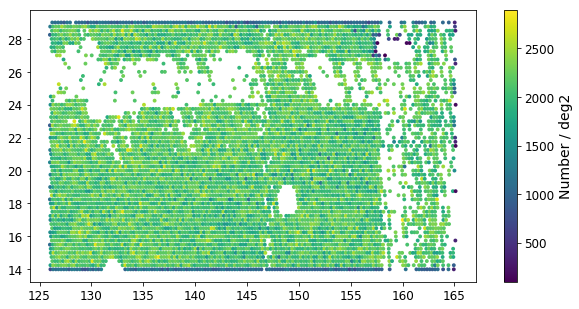

In [33]:
fig,ax=plt.subplots(figsize=(10,5))

num_density= summary.n_injected / 0.25**2 # n/deg2
keep=summary.dec > 10

kw=dict(edgecolors='none',marker='o',s=15,rasterized=True)
cax= ax.scatter(summary.ra[keep],summary.dec[keep], 
                c=num_density[keep], **kw)
           
cbar = fig.colorbar(cax) #, ticks=[-1, 0, 1])
cbar.set_label('Number / deg2')
#cbar.ax.set_yticklabels(['< -1', '0', '> 1'])

In [34]:
plt.scatter?

/Users/kaylan1/miniconda3/envs/mlbook/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [ ]:

x,y,z = np.meshgrid(summary.ra,summary.dec,num_density)
#plt.imshow(x,y,c=z)

## obiwan outputs

In [3]:
#dat= fits_table('randoms_rank98.fits')
dat= fits_table('randoms_rank90.fits') # apflux_resid info
len(dat)

Converted unique_id from |S20 to <U20
Converted tractor_brickname from |S4 to <U4
Converted tractor_type from |S4 to <U4


8113

In [62]:
dat.get_columns()

['id',
 'ra',
 'dec',
 'x',
 'y',
 'gflux',
 'mw_transmission_g',
 'rflux',
 'mw_transmission_r',
 'zflux',
 'mw_transmission_z',
 'n',
 'rhalf',
 'e1',
 'e2',
 'unique_id',
 'psql_id',
 'psql_ra',
 'psql_dec',
 'psql_g',
 'psql_r',
 'psql_z',
 'psql_rhalf',
 'psql_n',
 'psql_ba',
 'psql_pa',
 'psql_redshift',
 'tractor_release',
 'tractor_brickid',
 'tractor_brickname',
 'tractor_objid',
 'tractor_brick_primary',
 'tractor_type',
 'tractor_ra',
 'tractor_dec',
 'tractor_ra_ivar',
 'tractor_dec_ivar',
 'tractor_bx',
 'tractor_by',
 'tractor_dchisq',
 'tractor_ebv',
 'tractor_mjd_min',
 'tractor_mjd_max',
 'tractor_flux_u',
 'tractor_flux_g',
 'tractor_flux_r',
 'tractor_flux_i',
 'tractor_flux_z',
 'tractor_flux_y',
 'tractor_flux_ivar_u',
 'tractor_flux_ivar_g',
 'tractor_flux_ivar_r',
 'tractor_flux_ivar_i',
 'tractor_flux_ivar_z',
 'tractor_flux_ivar_y',
 'tractor_apflux_g',
 'tractor_apflux_r',
 'tractor_apflux_z',
 'tractor_apflux_resid_g',
 'tractor_apflux_resid_r',
 'tractor_apf

# Input properties (eBOSS)
* ra,dec region
* brightness, shape, size, redshift

#### NGC only 

(14, 34)

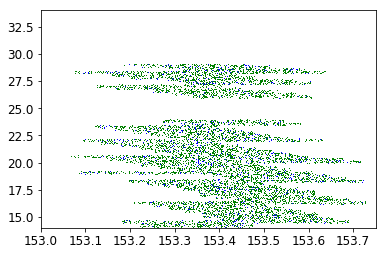

In [6]:
region='ngc'
corners=dict(ngc=dict(ra=(126,168),dec=(14,34)))

fig,ax=plt.subplots()
kw=dict(m='o',s=5.,alpha=0.75)
# plots.myscatter(ax,dat.ra,dat.dec, 
#                 color='b',label='uniform_randoms',**kw)
ax.plot(dat.ra,dat.dec,'b,')
isRec= dat.obiwan_mask == 1
# plots.myscatter(ax,dat.ra[isRec],dat.dec[isRec], 
#                 color='y',label='uniform_randoms',**kw)
ax.plot(dat.ra[isRec],dat.dec[isRec],'g,')
# plt.xlim(corners[region]['ra'])
plt.xlim(153,153.75)
plt.ylim(corners[region]['dec'])


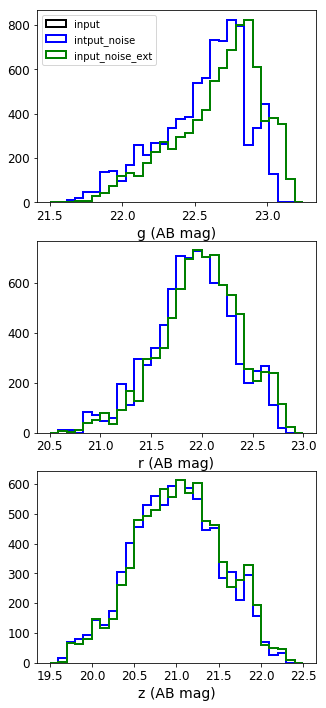

In [5]:
def myhist(ax,data,bins=20,color='b',normed=False,lw=2,ls='solid',label=None,
           range=None,return_h=False):
    kw= dict(bins=bins,color=color,normed=normed,
             histtype='step',range=range,lw=lw,ls=ls)
    if label:
        kw.update(label=label)
    h,bins,_=ax.hist(data,**kw)
    if return_h:
        return h

def my_step(ax,bins,height,
            lw=2,color='b',ls='solid',label=None):
    """if plt.hist returns tuple (height,bins) then this reproces that plot.
    
    e.g. bin centers and horizontal lines at the right place...
    """
    kw= dict(color=color,lw=lw,ls=ls)
    if label:
        kw.update(label=label)
    ax.step(bins[:-1],height,where='mid',**kw)

fig,axes=plt.subplots(3,1,figsize=(5,12))
plt.subplots_adjust(hspace=0.2,wspace=0.2)
xlim= dict(g=(21.5,23.25),
           r=(20.5,23),
           z=(19.5,22.5))

kw_hist= dict(bins=30,normed=False)
for ax,band in zip(axes,'grz'):
    flux=dict(input_noise_ext= dat.get(band+'flux'),
              intput_noise= dat.get(band+'flux')/\
                          dat.get('mw_transmission_'+band),
              input= plots.mag2flux(dat.get('psql_'+band))
             )
    for key,color in zip(sorted(list(flux.keys()),key=lambda x:len(x)),
                         'kbg'):
        mag= plots.flux2mag(flux[key])
        myhist(ax,mag,range=xlim[band],
               color=color,label=key,**kw_hist)
    ax.set_xlabel('%s (AB mag)' % band)
    
axes[0].legend(loc='upper left')




# fracflux, fracin, ranges?

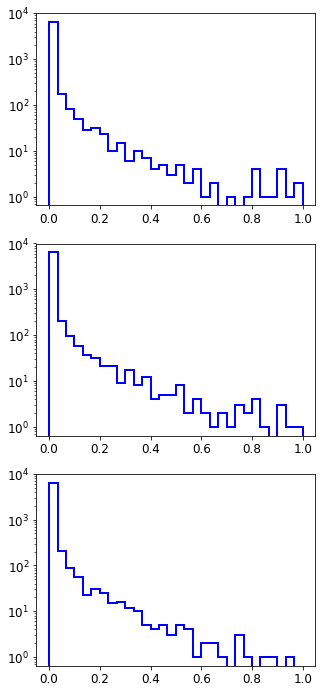

In [18]:
fig,axes=plt.subplots(3,1,figsize=(5,12))
plt.subplots_adjust(hspace=0.2,wspace=0.2)

xlim= (0,1)

isRec= dat.obiwan_mask == 1
kw_hist= dict(bins=30,normed=False)
for ax,band in zip(axes,'grz'):
    myhist(ax,dat.get('tractor_fracflux_%s' % band)[isRec],
           range=xlim,**kw_hist)
    ax.set_yscale('log')
    

/Users/kaylan1/miniconda3/envs/mlbook/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


Fracin cut removes 2103/8113


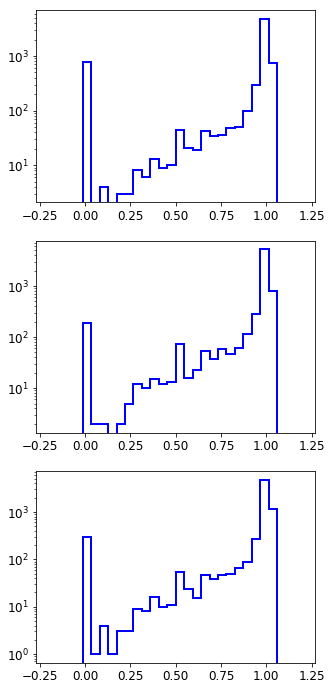

In [24]:
fig,axes=plt.subplots(3,1,figsize=(5,12))
plt.subplots_adjust(hspace=0.2,wspace=0.2)

xlim= (-0.2,1.2)

isRec= dat.obiwan_mask == 1
kw_hist= dict(bins=30,normed=False)
for ax,band in zip(axes,'grz'):
    myhist(ax,dat.get('tractor_fracin_%s' % band)[isRec],
           range=xlim,**kw_hist)
    ax.set_yscale('log')
    
fracin= np.mean(np.array([dat.tractor_fracin_g,
                          dat.tractor_fracin_r,
                          dat.tractor_fracin_z]),axis=0) > 0.7
print('Fracin cut removes %d/%d' % (len(dat[~fracin]),len(dat)))

## Are the any systematics in psql vs. +noise fluxes?

### No, but looks like bug in option to add noise, looks like noise wasn't added... Or is it that the noise added averages to zero for the ~ 20x20 pixels or whatever

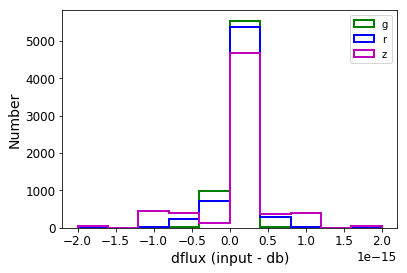

In [726]:
fig,ax=plt.subplots()

kw_hist= dict(bins=10,normed=False)
ylim=2e-15
for band,color in zip('grz','gbm'):
    flux= plots.mag2flux(dat.get('psql_'+band))
    flux_noise= dat.get(band+'flux')/\
                    dat.get('mw_transmission_'+band)
    myhist(ax,flux_noise-flux,range=(-ylim,ylim),color=color,
           label=band,**kw_hist)
    ax.set_ylabel('Number')
    ax.set_xlabel('dflux (input - db)')
ax.legend()


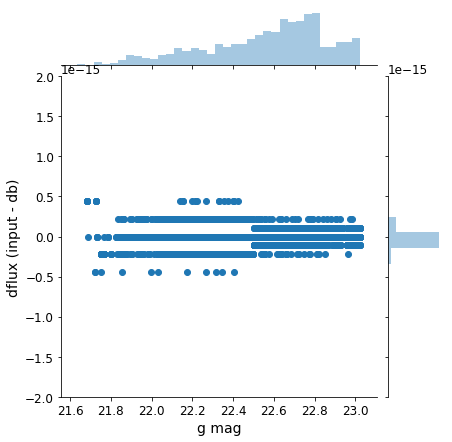

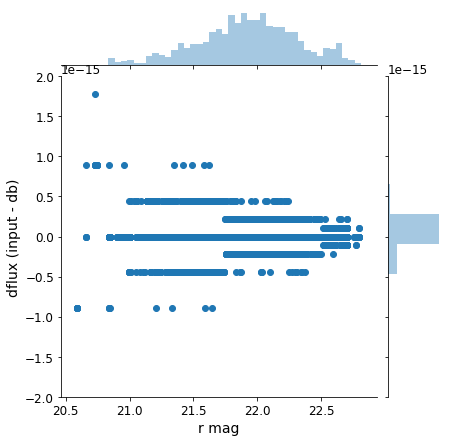

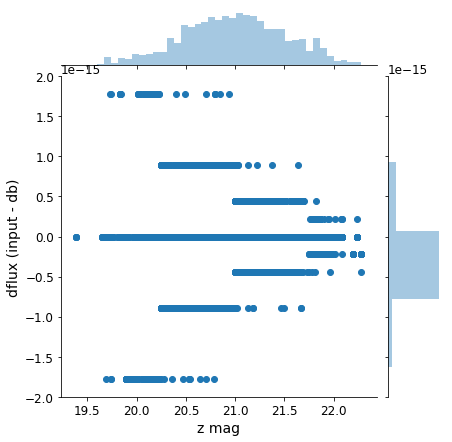

In [720]:
xlim= dict(g=(21.5,23.25),
           r=(20.5,23),
           z=(19.5,22.5))

kw_hist= dict(color='b',bins=30,normed=False)
ylim=2e-15
for ax,band in zip(axes,'grz'):
    flux= plots.mag2flux(dat.get('psql_'+band))
    flux_noise= dat.get(band+'flux')/\
                    dat.get('mw_transmission_'+band)
    g = sns.jointplot(plots.flux2mag(flux_noise),flux_noise-flux,
                      stat_func=None)
                      #plots.flux2mag(-1*(flux_noise - flux))) # color="g")
    g.ax_joint.set_ylim(-ylim,ylim)
    g.ax_joint.set_xlabel(band+' mag')
    g.ax_joint.set_ylabel('dflux (input - db)')

# ax.legend() #loc='upper left')

## Fraction recovered

/Users/kaylan1/miniconda3/envs/mlbook/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/Users/kaylan1/miniconda3/envs/mlbook/lib/python3.6/site-packages/matplotlib/cbook.py:2649: UserWarning: Saw kwargs ['ls', 'linestyle'] which are all aliases for 'linestyle'.  Kept value from 'linestyle'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/kaylan1/miniconda3/envs/mlbook/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


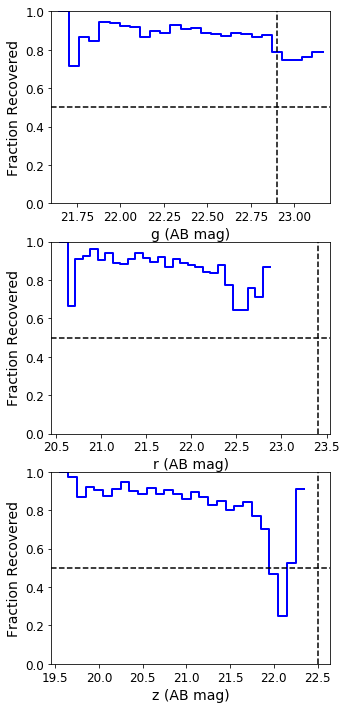

In [618]:
eboss_or_desi='eboss'

fig,axes=plt.subplots(3,1,figsize=(5,12))
plt.subplots_adjust(hspace=0.2,wspace=0.2)
xlim= dict(g=(21.5,23.25),
           r=(20.5,23),
           z=(19.5,22.5))


class getDepth(object):
    def __init__(self):
        self.desi= dict(g=24.0,
                        r=23.4,
                        z=22.5)
        self.eboss_ngc= dict(g=22.9,
                             r=self.desi['r'],
                             z=self.desi['z'])
        self.eboss_sgc= dict(g=22.825,
                             r=self.desi['r'],
                             z=self.desi['z'])
# D= plots.getDepth()
D= getDepth()

kw= dict(normed=False,return_vals=True)
for ax,band in zip(axes,'grz'):
    mag= plots.flux2mag(dat.get(band+'flux'))
    mag_rec= mag[isRec]
    n,bins= np.histogram(mag,bins=30,range=xlim[band],normed=False)
    n_rec,_= np.histogram(mag[isRec],bins=bins,range=xlim[band],normed=False)
    my_step(ax,bins,n_rec.astype(float)/n)
    ax.axhline(0.5,c='k',ls='--')
    #ax.axvline(plots.getDepth().eboss_ngc(band),c='k',ls='--')
    ax.axvline(D.eboss_ngc[band],c='k',ls='--')
#     ax.step(bins[:-1],n_rec/n,where='mid')
    ax.set_xlabel('%s (AB mag)' % band)
for ax in axes:
    ax.set_ylabel('Fraction Recovered')
    ax.set_ylim(0,1)
axes[0].legend(loc='upper left')

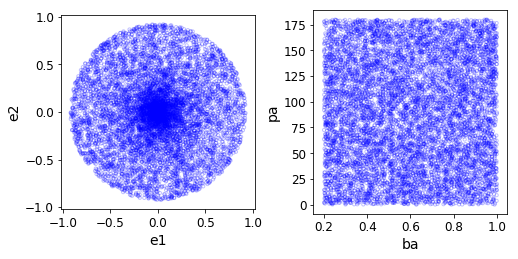

In [508]:
fig,ax=plt.subplots(1,2,figsize=(8,5))
plt.subplots_adjust(wspace=0.3)

kw=dict(color='b',m='o',s=10.,alpha=0.25)
plots.myscatter_open(ax[0],dat.e1,dat.e2,**kw)
plots.myscatter_open(ax[1],dat.psql_ba,dat.psql_pa,**kw)

ax[0].set_aspect('equal')
ax[1].set_aspect(abs((ax[1].get_xlim()[1]-ax[1].get_xlim()[0])/\
                     (ax[1].get_ylim()[1]-ax[1].get_xlim()[0])))

for i,xlab,ylab in [(0,'e1','e2'),(1,'ba','pa')]:
    ax[i].set_xlabel(xlab)
    ax[i].set_ylabel(ylab)
    

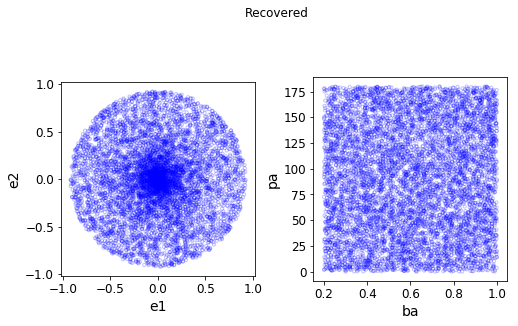

In [509]:
fig,ax=plt.subplots(1,2,figsize=(8,5))
plt.subplots_adjust(wspace=0.3)

isRec= dat.obiwan_mask == 1
kw=dict(color='b',m='o',s=10.,alpha=0.25)
plots.myscatter_open(ax[0],dat.e1[isRec],dat.e2[isRec],**kw)
plots.myscatter_open(ax[1],dat.psql_ba[isRec],dat.psql_pa[isRec],**kw)

ax[0].set_aspect('equal')
ax[1].set_aspect(abs((ax[1].get_xlim()[1]-ax[1].get_xlim()[0])/\
                     (ax[1].get_ylim()[1]-ax[1].get_xlim()[0])))

for i,xlab,ylab in [(0,'e1','e2'),(1,'ba','pa')]:
    ax[i].set_xlabel(xlab)
    ax[i].set_ylabel(ylab)
plt.suptitle('Recovered')

## horizontal bar plot by type: number input, recovered, measures of PSF, EXP...

In [35]:
types= np.char.strip(dat.get('tractor_type'))
types[pd.Series(types).isin(['SIMP','REX']).values]= 'EXP'
use_types= ['PSF','EXP','DEV','COMP']

isRec=dat.obiwan_mask == 1
#number input, recovered,...
injected= [0,len(dat[dat.n == 1]),len(dat[dat.n == 4]),0]
recovered= [0,len(dat[(isRec) & (dat.n == 1)]),
                  len(dat[(isRec) & (dat.n == 4)]),0]
tractor= [len(dat[(isRec) & (types == typ)])
               for typ in use_types]

df= pd.DataFrame(dict(type=use_types,
                      injected=injected,
                      recovered=recovered,
                      tractor=tractor))
df.set_index('type',inplace=True)
df.head()

injected  recovered  tractor
type                              
PSF          0          0      176
EXP       7453       6428     6507
DEV        839        714      451
COMP         0          0        8

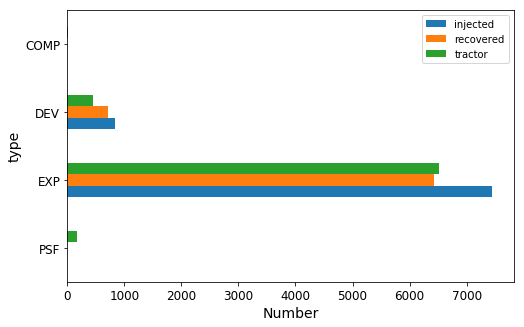

In [36]:
fig,ax= plt.subplots(figsize=(8, 5))
df.plot.barh(ax=ax)
xlab=ax.set_xlabel('Number')
plt.savefig('hey')

## Confusion matrix

In [44]:
def create_confusion_matrix(answer_type,predict_type, 
                            poss_types=['PSF','SIMP','EXP','DEV','COMP','REX']):
    '''compares classifications of matched objects, returns 2D array which is conf matrix and xylabels
    return 5x5 confusion matrix and colum/row names
    answer_type,predict_type -- arrays of same length with reference and prediction types'''
    for typ in set(answer_type): assert(typ in poss_types)
    for typ in set(predict_type): assert(typ in poss_types)
    ans_types= set(poss_types)
    cm=np.zeros((len(poss_types),len(poss_types)))-1
    for i_ans,ans_type in enumerate(poss_types):
        ind= np.where(answer_type == ans_type)[0]
        for i_pred,pred_type in enumerate(poss_types):
            n_pred= np.where(predict_type[ind] == pred_type)[0].size
            if ind.size > 0: cm[i_ans,i_pred]= float(n_pred)/ind.size # ind.size is constant for loop over pred_types
            else: cm[i_ans,i_pred]= 0 #np.nan
    return cm

def plot_confusion_matrix(cm,answer_names,all_names, qafile='test.png'):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues, vmin=0,vmax=1)
    cbar=plt.colorbar()
    plt.xticks(range(len(all_names)), all_names)
    plt.yticks(range(len(answer_names)), answer_names)
    ylab=plt.ylabel('Truth')
    xlab=plt.xlabel('Tractor')
    for row in range(len(answer_names)):
        for col in range(len(all_names)):
            if np.isnan(cm[row,col]):
                plt.text(col,row,'n/a',va='center',ha='center')
            elif cm[row,col] > 0.5:
                plt.text(col,row,'%.2f' % cm[row,col],va='center',ha='center',color='yellow')
            else:
                plt.text(col,row,'%.2f' % cm[row,col],va='center',ha='center',color='black')
    plt.savefig(qafile, bbox_extra_artists=[xlab,ylab], bbox_inches='tight',dpi=150)
    plt.close()

# Confusion matrix for distribution of object types
# Basic cm, use slim=False
#types= ['PSF','REX', 'SIMP', 'EXP', 'DEV', 'COMP']
input_type= np.array(['EXP']*len(dat))
input_type[(isRec) & (dat.n == 4)]= 'DEV'
cm= create_confusion_matrix(input_type[isRec],types[isRec], poss_types=use_types)
qafile = 'cm.png'
plot_confusion_matrix(cm,use_types,use_types, qafile)

/Users/kaylan1/miniconda3/envs/mlbook/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/Users/kaylan1/miniconda3/envs/mlbook/lib/python3.6/site-packages/matplotlib/cbook.py:2649: UserWarning: Saw kwargs ['ls', 'linestyle'] which are all aliases for 'linestyle'.  Kept value from 'linestyle'
  seen=seen, canon=canonical, used=seen[-1]))


(0.0, 1.0)

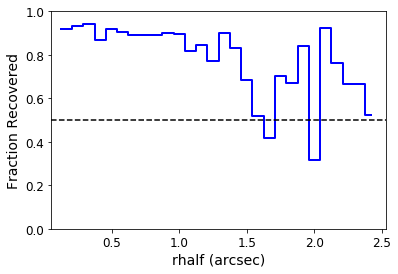

In [529]:
fig,ax=plt.subplots()
    
xlim=(0,2.5)
kw=dict(normed=False,range=xlim)

n,bins= np.histogram(dat.rhalf,bins=30,**kw)
n_rec,_= np.histogram(dat.rhalf[isRec],bins=bins,**kw)
my_step(ax,bins,n_rec/n)
ax.axhline(0.5,c='k',ls='--')

ax.set_xlabel('rhalf (arcsec)')
ax.set_ylabel('Fraction Recovered')
ax.set_ylim(0.0,1.)


/Users/kaylan1/PhdStudent/Research/desi/obiwan/py/obiwan/qa/plots.py:39: RuntimeWarning: divide by zero encountered in log10
  np.linspace(ylim[0],ylim[1],nbins[1])))
/Users/kaylan1/PhdStudent/Research/desi/obiwan/py/obiwan/qa/plots.py:39: RuntimeWarning: invalid value encountered in log10
  np.linspace(ylim[0],ylim[1],nbins[1])))
/Users/kaylan1/miniconda3/envs/mlbook/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in subtract
/Users/kaylan1/miniconda3/envs/mlbook/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  
/Users/kaylan1/miniconda3/envs/mlbook/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  
/Users/kaylan1/miniconda3/envs/mlbook/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys
/Users/kaylan1/miniconda3/envs/mlbook/lib/python3.6/site-packages/ipykernel_

(8292,) (8292,)


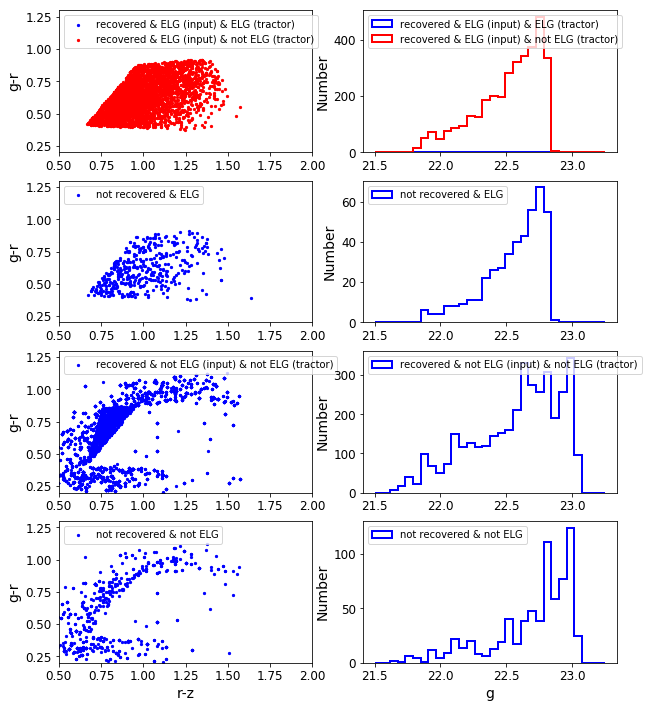

In [541]:
def eboss_ts(gmag,rz,gr,region='ngc'):
    colorCut= dict(sgc= ((gmag > 21.825) &
                         (gmag < 22.825) &
                         (-0.068 * rz + 0.457 < gr) &
                         (gr < 0.112 * rz + 0.773) &
                         (0.218 * gr + 0.571 < rz) &
                         (rz < -0.555 * gr + 1.901)),
                   ngc= ((gmag > 21.825) &
                         (gmag < 22.9) &
                         (-0.068 * rz + 0.457 < gr) &
                         (gr < 0.112 * rz + 0.773) &
                         (0.637 * gr + 0.399 < rz) &
                         (rz < -0.555 * gr + 1.901)))
    return colorCut[region]

fig,ax=plt.subplots(4,2,figsize=(10,12))
plt.subplots_adjust(hspace=0.2,wspace=0.2)

rz= dat.psql_r - dat.psql_z
gr= dat.psql_g - dat.psql_r
is_elg_input= eboss_ts(dat.psql_g,rz,gr,region='ngc')
is_elg_trac= np.zeros(len(dat),bool)
mags={}
for band in 'grz':
    mags[band]= plots.flux2mag(dat.get('tractor_flux_'+band)[isRec]/\
                                 dat.get('tractor_mw_transmission_'+band)[isRec])
is_elg_trac[isRec][eboss_ts(mags['g'],mags['r']-mags['z'],mags['g']-mags['r'],region='ngc')]= True

kw=dict(marker='.',s=20,alpha=1)
kw_hist=dict(bins=30,range=(21.5,23.25),normed=False)

lab,keep= 'recovered & ELG (input) & ELG (tractor)', ((is_elg_input) & (isRec) & (is_elg_trac))
ax[0,0].scatter(rz[keep],gr[keep],
                c='b',label=lab,**kw)
myhist(ax[0,1],dat.psql_g[keep],color='b',label=lab,**kw_hist)
lab,keep= 'recovered & ELG (input) & not ELG (tractor)', ((is_elg_input) & (isRec) & (~is_elg_trac))
if len(rz[keep]) > 0:
    ax[0,0].scatter(rz[keep],gr[keep],
                    c='r',label=lab,**kw)
    myhist(ax[0,1],dat.psql_g[keep],color='r',label=lab,**kw_hist)

lab,keep= 'not recovered & ELG', (is_elg_input) & (~isRec)
ax[1,0].scatter(rz[keep],gr[keep],
                c='b',label=lab,**kw)
myhist(ax[1,1],dat.psql_g[keep],color='b',label=lab,**kw_hist)

lab,keep= 'recovered & not ELG (input) & not ELG (tractor)', ((~is_elg_input) & (isRec) & (~is_elg_trac))
ax[2,0].scatter(rz[keep],gr[keep],
                c='b',label=lab,**kw)
myhist(ax[2,1],dat.psql_g[keep],color='b',label=lab,**kw_hist)
lab,keep= 'recovered & not ELG (input) & ELG (tractor)', ((~is_elg_input) & (isRec) & (is_elg_trac))
if len(rz[keep]) > 0:
    ax[2,0].scatter(rz[keep],gr[keep],
                    c='r',label=lab,**kw)
    myhist(ax[2,1],dat.psql_g[keep],color='r',label=lab,**kw_hist)
             
lab,keep= 'not recovered & not ELG', (~is_elg_input) & (~isRec)
ax[3,0].scatter(rz[keep],gr[keep],
                c='b',label=lab,**kw)
myhist(ax[3,1],dat.psql_g[keep],color='b',label=lab,**kw_hist)

num_plotted= len(rz[(is_elg_input) & (isRec)]) + \
             len(rz[(is_elg_input) & (~isRec)]) + \
             len(rz[(~is_elg_input) & (isRec)]) + \
             len(rz[(~is_elg_input) & (~isRec)])
assert(num_plotted == len(rz))


ax[-1,0].set_xlabel('r-z')
ax[-1,1].set_xlabel('g')
for row in range(4):
    ax[row,0].set_ylabel('g-r')
    ax[row,1].set_ylabel('Number')

for row in range(4):
    for col in range(2):
        ax[row,col].legend(loc='upper left')
    ax[row,0].set_xlim(0.5,2)
    ax[row,0].set_ylim(0.2,1.3)

In [460]:
dat.get_columns()

['id',
 'ra',
 'dec',
 'x',
 'y',
 'gflux',
 'mw_transmission_g',
 'rflux',
 'mw_transmission_r',
 'zflux',
 'mw_transmission_z',
 'n',
 'rhalf',
 'e1',
 'e2',
 'unique_id',
 'psql_id',
 'psql_ra',
 'psql_dec',
 'psql_g',
 'psql_r',
 'psql_z',
 'psql_rhalf',
 'psql_n',
 'psql_ba',
 'psql_pa',
 'psql_redshift',
 'tractor_release',
 'tractor_brickid',
 'tractor_brickname',
 'tractor_objid',
 'tractor_brick_primary',
 'tractor_type',
 'tractor_ra',
 'tractor_dec',
 'tractor_ra_ivar',
 'tractor_dec_ivar',
 'tractor_bx',
 'tractor_by',
 'tractor_dchisq',
 'tractor_ebv',
 'tractor_mjd_min',
 'tractor_mjd_max',
 'tractor_flux_u',
 'tractor_flux_g',
 'tractor_flux_r',
 'tractor_flux_i',
 'tractor_flux_z',
 'tractor_flux_y',
 'tractor_flux_ivar_u',
 'tractor_flux_ivar_g',
 'tractor_flux_ivar_r',
 'tractor_flux_ivar_i',
 'tractor_flux_ivar_z',
 'tractor_flux_ivar_y',
 'tractor_apflux_resid_g',
 'tractor_apflux_resid_r',
 'tractor_apflux_resid_z',
 'tractor_mw_transmission_u',
 'tractor_mw_transm

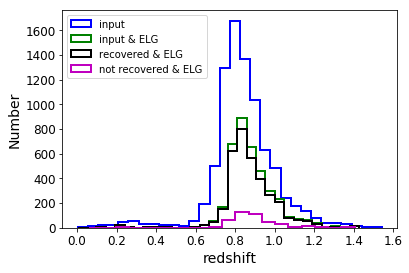

In [470]:
fig,ax=plt.subplots()
    
# xlim=(0,2.5)
xlim=None
kw=dict(range=None,normed=False,bins=30)

myhist(ax,dat.psql_redshift,color='b',label='input',**kw)

lab,keep= 'input & ELG', (is_elg_input)
myhist(ax,dat.psql_redshift[keep],color='g',label=lab,**kw)

lab,keep= 'recovered & ELG', (isRec) & (is_elg_input)
myhist(ax,dat.psql_redshift[keep],color='k',label=lab,**kw)

lab,keep= 'not recovered & ELG', (~isRec) & (is_elg_input)
myhist(ax,dat.psql_redshift[keep],color='m',label=lab)

ax.set_xlabel('redshift')
ax.set_ylabel('Number')
ax.legend(loc='upper left')

### 2 panel plot
* left panel
 * fraction of input that are ELGs based on truth input
 * fraction of ELGs that are recovered

* right panel
 * fraction of recovered ELGs that are tractor would call ELGs (correct targets)
 * fraction of recovered ELGs that tractor would not call ELGs (lost targets)
 * fraction of recovered that are not ELGs but would would call ELGs (contaminated targets)


In [549]:
rz= dat.psql_r - dat.psql_z
gr= dat.psql_g - dat.psql_r
is_elg_input= eboss_ts(dat.psql_g,rz,gr,region='ngc')
is_elg_trac= np.zeros(len(dat),bool)
mags={}
for band in 'grz':
    mags[band]= plots.flux2mag(dat.get('tractor_flux_'+band)[isRec]/\
                                 dat.get('tractor_mw_transmission_'+band)[isRec])
is_elg_trac[isRec][eboss_ts(mags['g'],mags['r']-mags['z'],mags['g']-mags['r'],region='ngc')]= True

/Users/kaylan1/PhdStudent/Research/desi/obiwan/py/obiwan/qa/plots.py:39: RuntimeWarning: divide by zero encountered in log10
  np.linspace(ylim[0],ylim[1],nbins[1])))
/Users/kaylan1/PhdStudent/Research/desi/obiwan/py/obiwan/qa/plots.py:39: RuntimeWarning: invalid value encountered in log10
  np.linspace(ylim[0],ylim[1],nbins[1])))
/Users/kaylan1/miniconda3/envs/mlbook/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in subtract
  
/Users/kaylan1/miniconda3/envs/mlbook/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  
/Users/kaylan1/miniconda3/envs/mlbook/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  
/Users/kaylan1/miniconda3/envs/mlbook/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys
/Users/kaylan1/miniconda3/envs/mlbook/lib/python3.6/site-packages/ipykerne

(-1, 1)

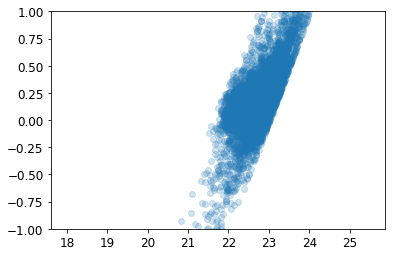

In [556]:
plt.scatter(mags['g'],mags['g']-dat.psql_g[isRec],alpha=0.2)
plt.ylim(-1,1)

# What do input ELGs look like in color space for input and measured colors?

## There are two ways to loose ELGs
* don't recover them
* recover them but measured properties fail target selection

## There are two ways to measure an ELG
* Truly passes TS, then recover it with measure that still pass TS
* does not pass TS, but recover it and measure error is such that is passes TS

/Users/kaylan1/PhdStudent/Research/desi/obiwan/py/obiwan/qa/plots.py:39: RuntimeWarning: divide by zero encountered in log10
  np.linspace(ylim[0],ylim[1],nbins[1])))
/Users/kaylan1/PhdStudent/Research/desi/obiwan/py/obiwan/qa/plots.py:39: RuntimeWarning: invalid value encountered in log10
  np.linspace(ylim[0],ylim[1],nbins[1])))
/Users/kaylan1/miniconda3/envs/mlbook/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in subtract
/Users/kaylan1/miniconda3/envs/mlbook/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  
/Users/kaylan1/miniconda3/envs/mlbook/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  
/Users/kaylan1/miniconda3/envs/mlbook/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys
/Users/kaylan1/miniconda3/envs/mlbook/lib/python3.6/site-packages/ipykernel_

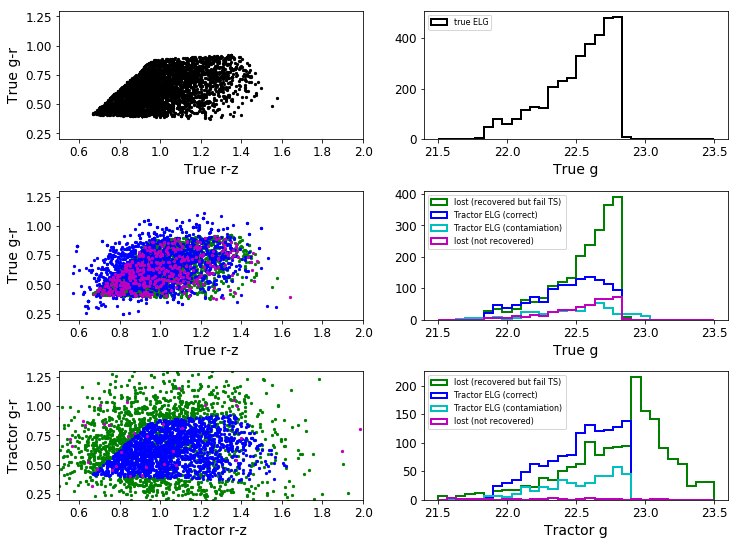

In [600]:
fig,axes=plt.subplots(3,2,figsize=(12,9))
plt.subplots_adjust(wspace=0.2,hspace=0.4)

kw_scatter=dict(marker='.',s=20,alpha=1)
kw_hist=dict(range=(21.5,23.5),normed=False)

# Row 0
row=0
lab,keep= 'true ELG',isRec & is_elg_input
axes[row,0].scatter(dat.psql_r[keep]-dat.psql_z[keep],
              dat.psql_g[keep]-dat.psql_r[keep],
              c='k',label=lab,**kw_scatter)
myhist(axes[row,1],dat.psql_g[keep],bins=30,color='k',label=lab,**kw_hist)

# Rows 1 & 2
mags={}
for band in 'grz':
    mags[band]= plots.flux2mag(dat.get('tractor_flux_'+band)/\
                                 dat.get('tractor_mw_transmission_'+band))
is_elg_trac= eboss_ts(mags['g'],mags['r']-mags['z'],mags['g']-mags['r'],region='ngc')

lab,keep= 'lost (recovered but fail TS)', (isRec) & (is_elg_input) & (~is_elg_trac)
row=1
axes[row,0].scatter(dat.psql_r[keep]-dat.psql_z[keep],
                    dat.psql_g[keep]-dat.psql_r[keep],
                    c='g',label=lab,**kw_scatter)
myhist(axes[row,1],dat.psql_g[keep],bins=30,color='g',label=lab,**kw_hist)
row=2
axes[row,0].scatter(mags['r'][keep]-mags['z'][keep],
                    mags['g'][keep]-mags['r'][keep],
                    c='g',label=lab,**kw_scatter)
myhist(axes[row,1],mags['g'][keep],bins=30,color='g',label=lab,**kw_hist)

lab,keep= 'Tractor ELG (correct)', (isRec) & (is_elg_input) & (is_elg_trac)
row=1
axes[row,0].scatter(dat.psql_r[keep]-dat.psql_z[keep],
                    dat.psql_g[keep]-dat.psql_r[keep],
                    c='b',label=lab,**kw_scatter)
myhist(axes[row,1],dat.psql_g[keep],bins=30,color='b',label=lab,**kw_hist)
row=2
axes[row,0].scatter(mags['r'][keep]-mags['z'][keep],
                    mags['g'][keep]-mags['r'][keep],
                    c='b',label=lab,**kw_scatter)
myhist(axes[row,1],mags['g'][keep],bins=30,color='b',label=lab,**kw_hist)

lab,keep= 'Tractor ELG (contamiation)', (isRec) & (~is_elg_input) & (is_elg_trac)
row=1
axes[row,0].scatter(dat.psql_r[keep]-dat.psql_z[keep],
                    dat.psql_g[keep]-dat.psql_r[keep],
                    c='b',label=lab,**kw_scatter)
myhist(axes[row,1],dat.psql_g[keep],bins=30,color='c',label=lab,**kw_hist)
row=2
axes[row,0].scatter(mags['r'][keep]-mags['z'][keep],
                    mags['g'][keep]-mags['r'][keep],
                    c='b',label=lab,**kw_scatter)
myhist(axes[row,1],mags['g'][keep],bins=30,color='c',label=lab,**kw_hist)


lab,keep= 'lost (not recovered)', (~isRec) & (is_elg_input)
row=1
axes[row,0].scatter(dat.psql_r[keep]-dat.psql_z[keep],
                    dat.psql_g[keep]-dat.psql_r[keep],
                    c='m',label=lab,**kw_scatter)
myhist(axes[row,1],dat.psql_g[keep],bins=30,color='m',label=lab,**kw_hist)
row=2
axes[row,0].scatter(mags['r'][keep]-mags['z'][keep],
                    mags['g'][keep]-mags['r'][keep],
                    c='m',label=lab,**kw_scatter)
myhist(axes[row,1],mags['g'][keep],bins=30,color='m',label=lab,**kw_hist)


col=0
for row in range(3):
    axes[row,col].set_xlim(0.5,2)
    axes[row,col].set_ylim(0.2,1.3)
axes[0,col].set_xlabel('True r-z')
axes[0,col].set_ylabel('True g-r')
axes[1,col].set_xlabel('True r-z')
axes[1,col].set_ylabel('True g-r')
axes[2,col].set_xlabel('Tractor r-z')
axes[2,col].set_ylabel('Tractor g-r')

col=1
axes[0,col].set_xlabel('True g')
axes[1,col].set_xlabel('True g')
axes[2,col].set_xlabel('Tractor g')
kw_leg= dict(loc='upper left',fontsize=8)
axes[0,col].legend(**kw_leg)
axes[1,col].legend(**kw_leg)
axes[2,col].legend(**kw_leg)
    



# myhist(axes[2],mags['g'][keep],bins=bins,color='g',label='meas ELG',**kw)
# keep= (isRec) & (is_elg_input) & (~is_elg_trac)
# myhist(axes[2],mags['g'][keep],bins=bins,color='k',label='meas not ELG',**kw)

# #for ax in axes:
# #     ax.set_xlim(0.5,2)
# #     ax.set_ylim(0.2,1.3)
# for ax in axes[2:]:
    

## Hist for the three above colors, three hists per band

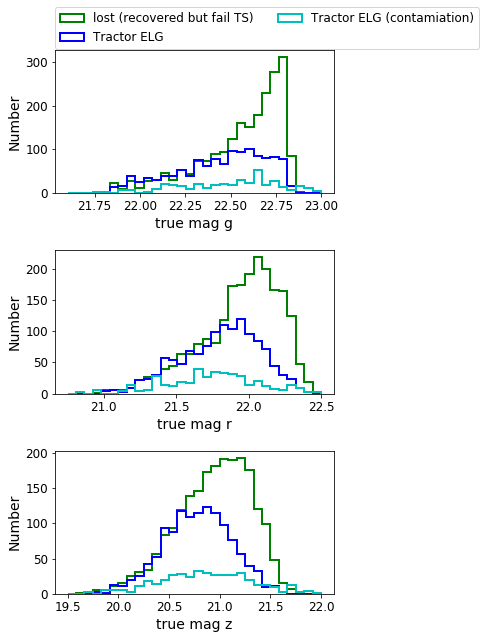

In [686]:
x_ivar=0
x_var= ['true_mag','galdepth','redshift'][x_ivar]
kw_hist=dict(bins=30,normed=False)

figs,axes= plt.subplots(3,1,figsize=(5,10))
plt.subplots_adjust(hspace=0.4)

ratio_area= 1. 
for ax,band in zip(axes,'grz'):
    if x_var == 'true_mag':
        _x_var= plots.flux2mag(dat.get(band+'flux')/\
                               dat.get('mw_transmission_'+band))
        xlab= 'true mag %s' % band
        xlim= dict(g=(21.6,23),
                   r=(20.75,22.5),
                   z=(19.5,22))
    elif x_var == 'galdepth':
        flux_for_depth= 5 / np.sqrt(dat.get('tractor_galdepth_'+band))
        _x_var= plots.flux2mag(flux_for_depth/\
                                 dat.get('mw_transmission_'+band))
        xlab= 'galdepth %s' % band
        xlim= dict(g=(22.5,24.5),
                   r=(22.5,24.5),
                   z=(21.5,23.5))
    elif x_var == 'redshift':
        _x_var= dat.psql_redshift
        xlab= 'redshift'
        xlim= dict(g=(0,1.5),
                   r=(0,1.5),
                   z=(0,1.5))
    #isPostiveFlux= ((np.isfinite(dmag)) &
    #                (np.isfinite(true_mag)))
    #isPostiveFlux= np.ones(len(dmag),bool)
    #print('true_mag=',true_mag[isPostiveFlux],'trac_mag=',dmag[isPostiveFlux])
    
    # Plot
    for lab,color,keep in [('lost (recovered but fail TS)','g', (isRec) & (is_elg_input) & (~is_elg_trac)),
                           ('Tractor ELG','b', (isRec) & (is_elg_input) & (is_elg_trac)),
                           ('Tractor ELG (contamiation)', 'c',(isRec) & (~is_elg_input) & (is_elg_trac))]:
        myhist(ax,_x_var[keep],color=color,label=lab,range=xlim[band],**kw_hist)
    ylab='Number'
    if kw_hist['normed']:
        ylab='PDF'
    ax.set_ylabel(ylab)
    ax.set_xlabel(xlab)

axes[0].legend(loc=(0,1.01),ncol=2,fontsize=12,markerscale=3)

## dmag for the three above colors

/Users/kaylan1/PhdStudent/Research/desi/obiwan/py/obiwan/qa/plots.py:39: RuntimeWarning: divide by zero encountered in log10
  np.linspace(ylim[0],ylim[1],nbins[1])))
/Users/kaylan1/PhdStudent/Research/desi/obiwan/py/obiwan/qa/plots.py:39: RuntimeWarning: invalid value encountered in log10
  np.linspace(ylim[0],ylim[1],nbins[1])))


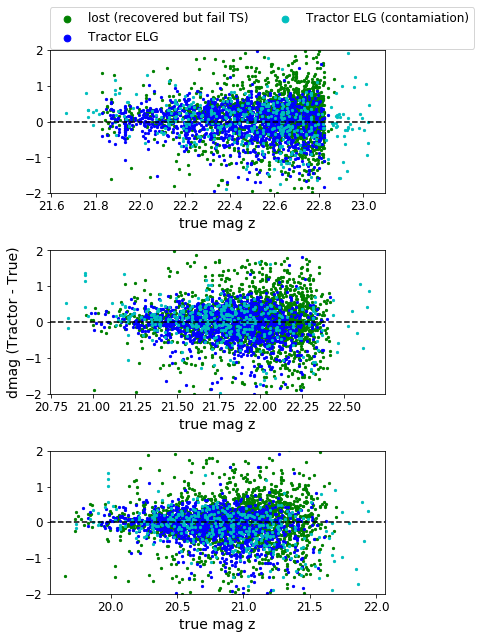

In [693]:
percentile_lines=False
x_ivar=0
y_ivar=0
x_var= ['true_mag','galdepth','redshift'][x_ivar]
y_var= ['dmag','chisq'][y_ivar]

figs,axes= plt.subplots(3,1,figsize=(6,10))
plt.subplots_adjust(hspace=0.4)

ratio_area= 1. 
for ax,band in zip(axes,'grz'):
    fix= ratio_area * np.average([dat.get('tractor_apflux_resid_'+band)[:,6],
                                  dat.get('tractor_apflux_resid_'+band)[:,7]],
                                axis=0)
    assert(len(fix)) == len(dat)
    if y_var == 'dmag':
        _y_var= plots.flux2mag(dat.get('tractor_flux_'+band)) -\
                   plots.flux2mag(dat.get(band+'flux')+  fix)
        ylab= 'dmag (Tractor - True)'
        ylim=(-2,2)
    elif y_var == 'chisq':
        _y_var= dat.get('tractor_flux_'+band) -\
                   (dat.get(band+'flux')+  fix)
        _y_var *= np.sqrt(dat.get('tractor_flux_ivar_'+band))
        ylab= 'chiflux (Tractor - True) * sqrt(ivar)'
        ylim=(-10,10)
    
    if x_var == 'true_mag':
        _x_var= plots.flux2mag(dat.get(band+'flux')/\
                               dat.get('mw_transmission_'+band))
        xlab= 'true mag %s' % band
        xlim= dict(g=(21.6,23),
                   r=(20.75,22.5),
                   z=(19.5,22))
    elif x_var == 'galdepth':
        flux_for_depth= 5 / np.sqrt(dat.get('tractor_galdepth_'+band))
        _x_var= plots.flux2mag(flux_for_depth/\
                                 dat.get('mw_transmission_'+band))
        xlab= 'galdepth %s' % band
        xlim= dict(g=(21,24.5),
                   r=(21,24.5),
                   z=(21,24.5))
    elif x_var == 'redshift':
        _x_var= dat.psql_redshift
        xlab= 'redshift'
        xlim= dict(g=(0,1.5),
                   r=(0,1.5),
                   z=(0,1.5))
    
    #isPostiveFlux= ((np.isfinite(dmag)) &
    #                (np.isfinite(true_mag)))
    #isPostiveFlux= np.ones(len(dmag),bool)
    #print('true_mag=',true_mag[isPostiveFlux],'trac_mag=',dmag[isPostiveFlux])
    
    # Plot
    for lab,color,keep in [('lost (recovered but fail TS)','g', (isRec) & (is_elg_input) & (~is_elg_trac)),
                           ('Tractor ELG','b', (isRec) & (is_elg_input) & (is_elg_trac)),
                           ('Tractor ELG (contamiation)', 'c',(isRec) & (~is_elg_input) & (is_elg_trac))]:
        if percentile_lines:
            binned= plots.bin_up(_x_var[keep],_y_var[keep], 
                                 bin_minmax=xlim[band],nbins=30)
            for perc in ['q25','q75']:
                kw= dict(c=color,lw=2)
                if perc == 'q25':
                    kw.update(label=lab)
                ax.plot(binned['binc'],binned[perc],**kw)
        else:
            ax.scatter(_x_var[keep],_y_var[keep],
                       alpha=1,s=5,c=color,label=lab)
            #ax.scatter(true_mag[(isPostiveFlux) & (keep)],dmag[(isPostiveFlux) & (keep)],
            #           alpha=1,s=5,c=color,label=lab)
    
for ax,band in zip(axes,'grz'):
    ax.axhline(0,c='k',ls='--')
    ax.set_ylim(ylim)
axes[1].set_ylabel(ylab)
axes[0].legend(loc=(0,1.01),ncol=2,fontsize=12,markerscale=3)

for ax in axes:
    ax.set_xlabel(xlab)

## dflux/std dev vs. Unit Gaussian

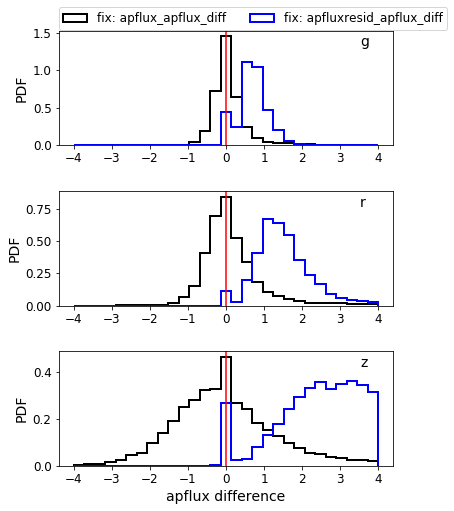

In [96]:
figs,axes= plt.subplots(3,1,figsize=(6,8))
plt.subplots_adjust(hspace=0.4)

isRec= dat.obiwan_mask == 1

xlims=(-4,4)
for ax,band in zip(axes,'grz'):
    apflux_apflux_diff= dat.get('tractor_apflux_'+band)[:,-1] -\
                    dat.get('tractor_apflux_'+band)[:,-2]
    apflux_apfluxresid_diff= dat.get('tractor_apflux_'+band)[:,5] - \
                    dat.get('tractor_apflux_resid_'+band)[:,5]
    
    bins= np.linspace(xlims[0],xlims[1],num=30)
    myhist(ax,apflux_apflux_diff[isRec],bins=bins,color='k',
           normed=True,label='fix: apflux_apflux_diff')
    myhist(ax,apflux_apfluxresid_diff[isRec],bins=bins,color='b',
           normed=True,label='fix: apfluxresid_apflux_diff')
    #ax.axvline(np.median(fix[isRec]),c='y',ls='-',label='median(fix)')
    ax.axvline(0,c='r',ls='-')
    plots.mytext(ax,0.9,0.9,band,fontsize=14)
    
    #isPostiveFlux= ((np.isfinite(dmag)) &
    #                (np.isfinite(true_mag)))
    #isPostiveFlux= np.ones(len(dmag),bool)
    #print('true_mag=',true_mag[isPostiveFlux],'trac_mag=',dmag[isPostiveFlux])

xlab=axes[-1].set_xlabel(r'apflux difference')
#for ax,band in zip(axes,'grz'):
#    ax.set_xlim(ylim)
for ax in axes:
    ax.set_ylabel('PDF')
axes[0].legend(loc=(0,1.01),ncol=2,fontsize=12,markerscale=3)

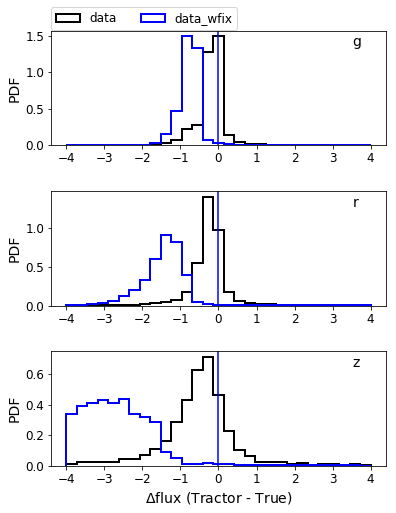

In [93]:
figs,axes= plt.subplots(3,1,figsize=(6,8))
plt.subplots_adjust(hspace=0.4)

apply_fix= True
sub_median= False

isRec= dat.obiwan_mask == 1
data_lab='data'
if apply_fix:
    data_lab+='+fix'
if sub_median:
    data_lab+='-median'

xlims=(-4,4)
for ax,band in zip(axes,'grz'):
    #fix= dat.get('tractor_apflux_'+band)[:,-1] -\
    #        dat.get('tractor_apflux_'+band)[:,-2]
    fix= dat.get('tractor_apflux_'+band)[:,4] - \
            dat.get('tractor_apflux_resid_'+band)[:,4]
    dflux= dat.get('tractor_flux_'+band) - dat.get(band+'flux')
    dflux_wfix= dflux + fix
    
    bins= np.linspace(xlims[0],xlims[1],num=30)
    myhist(ax,dflux[isRec],bins=bins,color='k',
           label='data',normed=True)
    myhist(ax,dflux_wfix[isRec],bins=bins,color='b',
           label='data_wfix',normed=True)
    #ax.axvline(np.median(dflux[isRec]),c='y',ls='-',label='median(data)')
    ax.axvline(0,c='b',ls='-')
    plots.mytext(ax,0.9,0.9,band,fontsize=14)
    
    #isPostiveFlux= ((np.isfinite(dmag)) &
    #                (np.isfinite(true_mag)))
    #isPostiveFlux= np.ones(len(dmag),bool)
    #print('true_mag=',true_mag[isPostiveFlux],'trac_mag=',dmag[isPostiveFlux])

xlab=axes[-1].set_xlabel(r'$\Delta$flux (Tractor - True)')
#for ax,band in zip(axes,'grz'):
#    ax.set_xlim(ylim)
for ax in axes:
    ax.set_ylabel('PDF')
axes[0].legend(loc=(0,1.01),ncol=2,fontsize=12,markerscale=3)

g: dflux_mean=-1.481467
r: dflux_mean=-1.928699
z: dflux_mean=-1.641154


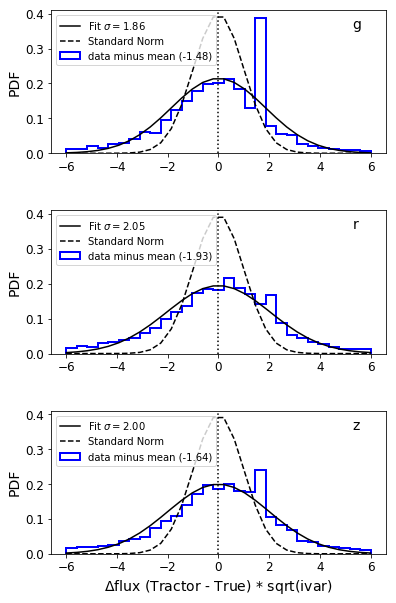

In [128]:
figs,axes= plt.subplots(3,1,figsize=(6,10))
plt.subplots_adjust(hspace=0.4)

apply_fix= False
sub_mean= True
use_psql_flux=False
num_std_lims=(-6,6)

from scipy.stats import norm
rv = norm()
isRec= dat.obiwan_mask == 1

def gauss_model(p,x):
    return 1/np.sqrt(2*np.pi*p[0]**2) * np.exp(-x**2/(2*p[0]**2))

for ax,band in zip(axes,'grz'):
    data_lab= 'data'
    if apply_fix:
        fix= np.average([dat.get('tractor_apflux_resid_'+band)[:,6],
                         dat.get('tractor_apflux_resid_'+band)[:,7]],
                        axis=0)
        data_lab+='+fix'
        #fix= apflux_apfluxresid_diff= dat.get('tractor_apflux_'+band)[:,5] - \
        #            dat.get('tractor_apflux_resid_'+band)[:,5]
        
    else:
        fix=0
    if use_psql_flux:
        num_std_dev= dat.get('tractor_flux_'+band) -\
                       (plots.mag2flux(dat.get('psql_'+band))+  fix)
    else: 
        num_std_dev= dat.get('tractor_flux_'+band) -\
                        (dat.get(band+'flux')+  fix)

    num_std_dev *= np.sqrt(dat.get('tractor_flux_ivar_'+band))
    if sub_mean:
        #keep= ((num_std_dev >= num_std_lims[0]) &
        #       (num_std_dev <= num_std_lims[0]) 
        dflux_mean= np.mean(num_std_dev[isRec])
        num_std_dev -= dflux_mean
        print('%s: dflux_mean=%f' % (band,dflux_mean))
        data_lab+=' minus mean (%.2f)' % dflux_mean
    
    bins= np.linspace(num_std_lims[0],num_std_lims[1],num=30)
    h=myhist(ax,num_std_dev[isRec],bins=bins,color='b',
           label=data_lab,normed=True,
           return_h=True)
    
    from scipy.optimize import leastsq
    #fitfunc = lambda p, x: p[0]*np.cos(2*np.pi/p[1]*x+p[2]) + p[3] 
    errfunc = lambda p, x, y: gauss_model(p, x) - y
    p0 = [1.] # Initial guess
    binc= (bins[:-1]+bins[1:])/2
    p1, success = leastsq(errfunc, p0[:], args=(binc, h))
    assert(success != 0)
    norm_fit= norm(scale=p1[0])
    ax.plot(bins,norm_fit.pdf(bins),'k-',label=r'Fit $\sigma=$%.2f' % p1[0])

    
    #ax.axvline(np.mean(num_std_dev[isRec]),c='g',ls='--',label='mean(data)')
    ax.plot(bins,rv.pdf(bins),'k--',label='Standard Norm')
    ax.axvline(0,c='k',ls='dotted')
    plots.mytext(ax,0.9,0.9,band,fontsize=14)
    #isPostiveFlux= ((np.isfinite(dmag)) &
    #                (np.isfinite(true_mag)))
    #isPostiveFlux= np.ones(len(dmag),bool)
    #print('true_mag=',true_mag[isPostiveFlux],'trac_mag=',dmag[isPostiveFlux])

xlab=axes[-1].set_xlabel(r'$\Delta$flux (Tractor - True) * sqrt(ivar)')
#for ax,band in zip(axes,'grz'):
#    ax.set_xlim(ylim)
for ax in axes:
    ax.set_ylabel('PDF')
    ax.legend(loc='upper left',fontsize=10,markerscale=3)

In [134]:
types=np.char.strip(dat.tractor_type)
types[types == 'EXP']

{'', 'COMP', 'DEV', 'EXP', 'PSF', 'SIMP'}

(0, 3)

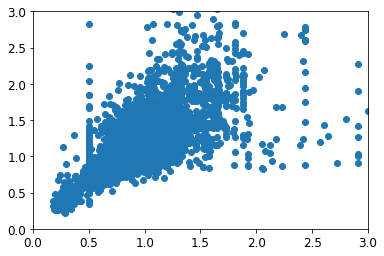

In [147]:
typ= 'exp'
plt.scatter(dat.rhalf[types == typ.upper()],dat.get('tractor_shape'+typ+'_r')[types == typ.upper()])
plt.ylim(0,3)
plt.xlim(0,3)

/Users/kaylan1/miniconda3/envs/mlbook/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


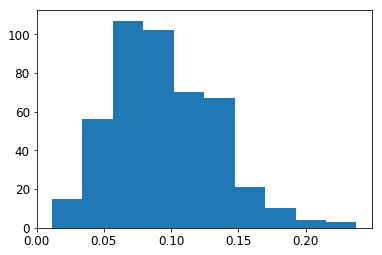

In [152]:
typ='dev'
isType= types == typ.upper()
x=1/np.sqrt(dat.get('tractor_shape%s_e1_ivar' % typ))
keep= np.isfinite(x) & isType
_=plt.hist(x[keep])

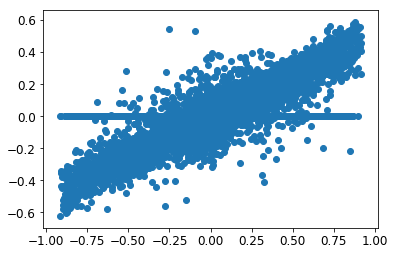

In [142]:
plt.scatter(dat.e1[isRec],dat.tractor_shapeexp_e1[isRec])

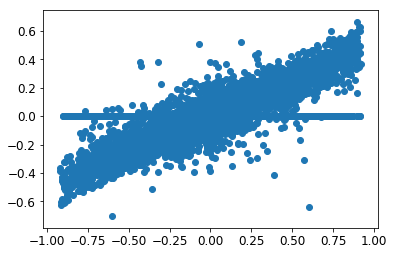

In [153]:
plt.scatter(dat.e2[isRec],-dat.tractor_shapeexp_e2[isRec])

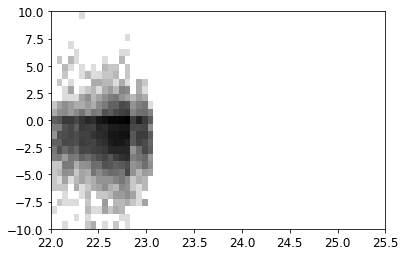

In [131]:
band='g'
xlim=(22,25.5)
ylim=(-10,10)
nbins=(60,30)

num_std_dev= dat.get('tractor_flux_'+band) -\
                        dat.get(band+'flux')
num_std_dev *= np.sqrt(dat.get('tractor_flux_ivar_'+band))
true_mag= plots.flux2mag(dat.get(band+'flux')/\
                           dat.get('mw_transmission_'+band))

fig,ax=plt.subplots()
#plots.myhist2D(ax,true_mag[isRec],num_std_dev[isRec],
#               xlim=xlim,ylim=(-10,10),nbins=(60,30))
#bins= np.linspace(xlim[0],xlim[1],num=30)

H, xbins, ybins = np.histogram2d(true_mag[isRec],num_std_dev[isRec],
                                 bins=(np.linspace(xlim[0],xlim[1],nbins[0]),
                                       np.linspace(ylim[0],ylim[1],nbins[1])))
cmap = plt.cm.binary
cmap.set_bad('w', 1.)
H[H == 0] = 1  # prevent warnings in log10
ax.imshow(np.log10(H).T, origin='lower',
          #extent=[xbins[0], xbins[-1], ybins[0], ybins[-1]],
          extent=[xlim[0], xlim[1], ylim[0], ylim[1]],
          cmap=cmap, interpolation='nearest',
          aspect='auto')

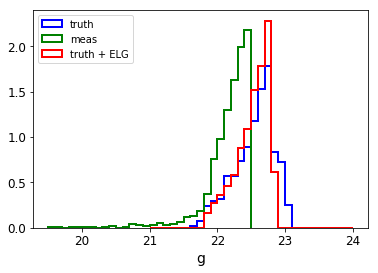

In [728]:
fig,ax=plt.subplots()

kw=dict(range=(21,24),normed=True)
myhist(ax,dat.psql_g[isRec],bins=30,color='b',label='truth',**kw)
myhist(ax,mags['g'],bins=bins,color='g',label='meas',**kw)
myhist(ax,dat.psql_g[ is_elg_input],bins=30,color='r',label='truth + ELG',**kw)

#for ax in axes:
#     ax.set_xlim(0.5,2)
#     ax.set_ylim(0.2,1.3)
ax.set_xlabel('g')
#     ax.set_ylabel('g-r')
ax.legend(loc='upper left')

n_corr= [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
n_lost= [   2    6    5   18    8    5   11    1    3   26   84  559 1091  724  395
  256   73   81   31   13   13    4    0    0    0    0    0    0    0    0]
n_contam= [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/Users/kaylan1/miniconda3/envs/mlbook/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/Users/kaylan1/miniconda3/envs/mlbook/lib/python3.6/site-packages/matplotlib/cbook.py:2649: UserWarning: Saw kwargs ['ls', 'linestyle'] which are all aliases for 'linestyle'.  Kept value from 'linestyle'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/kaylan1/miniconda3/envs/mlbook/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/Users/kaylan1/miniconda3/envs/mlbook/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/Users/kaylan1/miniconda3/envs/mlbook/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
/Users/kaylan1/miniconda3/envs/mlbook/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in

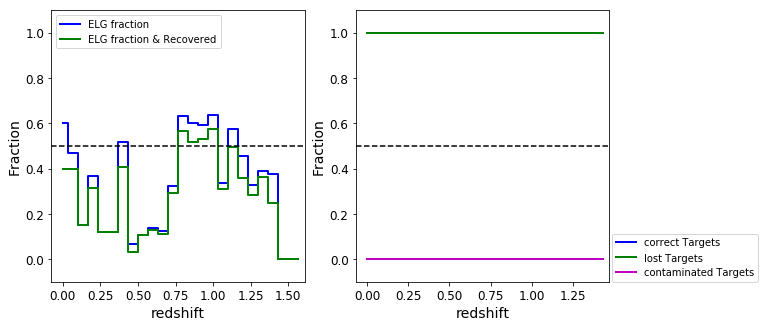

In [548]:
fig,axes=plt.subplots(1,2,figsize=(10,5))
plt.subplots_adjust(wspace=0.2)
# xlim=(0,2.5)
xlim=None
kw=dict(range=(0,2),normed=False)

# Left panel
ax= axes[0]
n_tot,bins= np.histogram(dat.psql_redshift,bins=30,**kw)

lab,keep= 'ELG fraction', (is_elg_input)
n_elg,bins= np.histogram(dat.psql_redshift[keep],bins=bins,**kw)
my_step(ax,bins,n_elg/n_tot,color='b',label=lab)

lab,keep= 'ELG fraction & Recovered', (isRec) & (is_elg_input)
n_elg_rec,_= np.histogram(dat.psql_redshift[keep],bins=bins,**kw)
my_step(ax,bins,n_elg_rec/n_tot,color='g',label=lab)

# Right panel
ax= axes[1]
lab,keep= 'correct Targets', (isRec) & (is_elg_input) & (is_elg_trac)
n_corr,_= np.histogram(dat.psql_redshift[keep],bins=bins,**kw)
my_step(ax,bins,n_corr/n_elg_rec,color='b',label=lab)
print('n_corr=',n_corr)

lab,keep= 'lost Targets', (isRec) & (is_elg_input) & (~is_elg_trac)
n_lost,_= np.histogram(dat.psql_redshift[keep],bins=bins,**kw)
my_step(ax,bins,n_lost/n_elg_rec,color='g',label=lab)
print('n_lost=',n_lost)

lab,keep= 'contaminated Targets', (isRec) & (~is_elg_input) & (is_elg_trac)
n_contam,_= np.histogram(dat.psql_redshift[keep],bins=bins,**kw)
my_step(ax,bins,n_contam/n_elg_rec,color='m',label=lab)
print('n_contam=',n_contam)

for ax in axes:
    ax.axhline(0.5,c='k',ls='--')
    ax.set_ylim(-0.1,1.1)
    ax.set_ylabel('Fraction')
    ax.set_xlabel('redshift')
axes[0].legend(loc='upper left')
axes[1].legend(loc=(1.01,0))

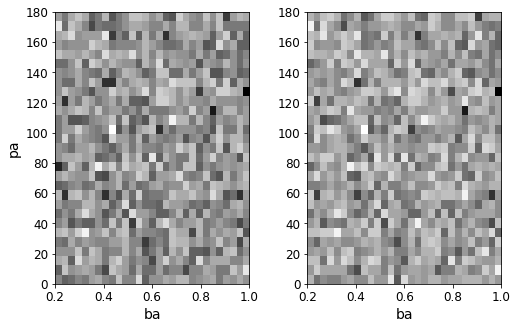

In [417]:
def myhist2D(ax,x,y,xlim=(),ylim=(),nbins=()):
    #http://www.astroml.org/book_figures/chapter1/fig_S82_hess.html
    H, xbins, ybins = np.histogram2d(x,y,
                                     bins=(np.linspace(xlim[0],xlim[1],nbins[0]),
                                           np.linspace(ylim[0],ylim[1],nbins[1])))
    cmap = plt.cm.binary
    ax.imshow(H.T, origin='lower',
              extent=[xbins[0], xbins[-1], ybins[0], ybins[-1]],
              cmap=cmap, interpolation='nearest',
              aspect='auto')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


isRec= dat.obiwan_mask == 1
fig,axes=plt.subplots(1,2,figsize=(8,5))
plt.subplots_adjust(wspace=0.3)

kw=dict(xlim=(0.2,1.0),ylim=(0,180),nbins=(30,30))
for ax,keep in zip(axes,
                   [np.ones(len(dat),bool),isRec]):
    myhist2D(ax,dat.psql_ba[keep],dat.psql_pa[keep],**kw)

# ax[0].set_aspect('equal')
# ax[1].set_aspect(abs((ax[1].get_xlim()[1]-ax[1].get_xlim()[0])/\
#                      (ax[1].get_ylim()[1]-ax[1].get_xlim()[0])))

for i in range(2):
    axes[i].set_xlabel('ba')
axes[0].set_ylabel('pa')
    

# How to Fix dflux using apflux_resid!!!!
* the fix makes faint end of the residual have larger scatter than bright end which is what expect

fix= [ 0.46955267 -0.21419707  0.2856611  ...,  0.21198358  0.13909206
 -0.32362264] dflux= [-0.60327875  0.13913705 -0.08202423 ..., -0.05187323 -0.03534078
 -0.02667671]
median= -0.531838792528
fix= [ 0.83753693 -0.44062534  0.81644279 ...,  0.25070146  0.35351264
 -1.73575914] dflux= [-0.60327875  0.13913705 -0.08202423 ..., -0.05187323 -0.03534078
 -0.02667671]
median= -0.44539169405
fix= [ 1.32278228 -0.80876064  1.78851771 ..., -1.24446416 -0.04480623
 -2.68531513] dflux= [-0.60327875  0.13913705 -0.08202423 ..., -0.05187323 -0.03534078
 -0.02667671]
median= -0.179187853022
fix= [ 2.67648363 -1.0258615   0.90383226 ..., -2.88036346  1.83955121
 -4.72889614] dflux= [-0.60327875  0.13913705 -0.08202423 ..., -0.05187323 -0.03534078
 -0.02667671]
median= 0.235969813752
fix= [ 1.99963295 -0.91731107  1.34617499 ..., -2.06241381  0.89737249
 -3.70710564] dflux= [-0.60327875  0.13913705 -0.08202423 ..., -0.05187323 -0.03534078
 -0.02667671]
median= 0.0162609069016


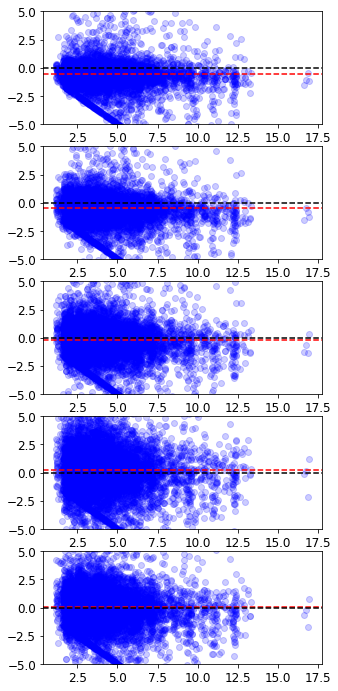

In [334]:
band='z'
figs,ax= plt.subplots(5,1,figsize=(5,12))

isRec= dat.obiwan_mask == 1
dflux= dat.get('tractor_flux_'+band)[isRec] - dat.get(band+'flux')[isRec]
rad_aper= [0.5,0.75,1.0,1.5,2.0,3.5,5.0,7.0]
for cnt,i_aper in enumerate([4,5,6,7,-1]):
    ratio_area= 1. 
    #ratio_area= (1.5*dat.rhalf[isRec] / rad_aper[i_aper])**2
    if i_aper == -1:
        fix= ratio_area * np.average([dat.get('tractor_apflux_resid_'+band)[isRec,6],
                                      dat.get('tractor_apflux_resid_'+band)[isRec,7]],
                                    axis=0)
        assert(len(fix)) == len(dat[isRec])
    else:
        fix= dat.get('tractor_apflux_resid_'+band)[isRec,i_aper]* ratio_area
    print('fix=',fix,'dflux=',dflux)
    y= dflux - fix
    ax[cnt].scatter(dat.get(band+'flux')[isRec],y,
                    alpha=0.2,c='b')
    ax[cnt].axhline(np.median(y),c='r',ls='--')
    print('median=',np.median(y))

for i in range(5):
    ax[i].axhline(0,c='k',ls='--')
#     ax[i].set_yscale('log')
#     ax[i].set_ylim(1e-2,2e1)
    ax[i].set_ylim(-5,5)

### dmag
* True mag: brightness of source + its noise + extinction
* dmag: tractor measured mag - true_mag - sky_mag from sky at that source position

/Users/kaylan1/PhdStudent/Research/desi/obiwan/py/obiwan/qa/plots.py:39: RuntimeWarning: divide by zero encountered in log10
  np.linspace(ylim[0],ylim[1],nbins[1])))
/Users/kaylan1/PhdStudent/Research/desi/obiwan/py/obiwan/qa/plots.py:39: RuntimeWarning: invalid value encountered in log10
  np.linspace(ylim[0],ylim[1],nbins[1])))


true_mag= [ 20.93833542  21.20184135  20.8072052  ...,  21.31015587  21.77809906
  21.01568413] trac_mag= [ 0.29185285 -0.1210452   0.08480629 ...,  0.09607506  0.09786368
 -0.08881957]
median= 0.133546854082
true_mag= [ 20.93833542  21.20184135  20.8072052  ...,  21.31015587  21.77809906
  21.01568413] trac_mag= [ 0.3762652  -0.20637092  0.19661195 ...,  0.10948405  0.20720452
 -0.65323161]
median= 0.10447186237
true_mag= [ 20.93833542  21.20184135  20.8072052  ...,  21.31015587  21.77809906
  21.01568413] trac_mag= [ 0.47840095 -0.3612303   0.37558672 ..., -0.58803373 -0.00557145
 -1.31910432]
median= 0.0395384160801
true_mag= [ 20.93833542  21.20184135  20.8072052  ...,  20.82847595  21.31015587
  21.77809906] trac_mag= [ 0.72108025 -0.4641138   0.21396448 ..., -1.81171733 -5.21707271
  0.76005683]
median= -0.0505317558301
true_mag= [ 20.93833542  21.20184135  20.8072052  ...,  21.31015587  21.77809906
  21.01568413] trac_mag= [ 0.60650687 -0.41145386  0.2977802  ..., -1.32543575  0

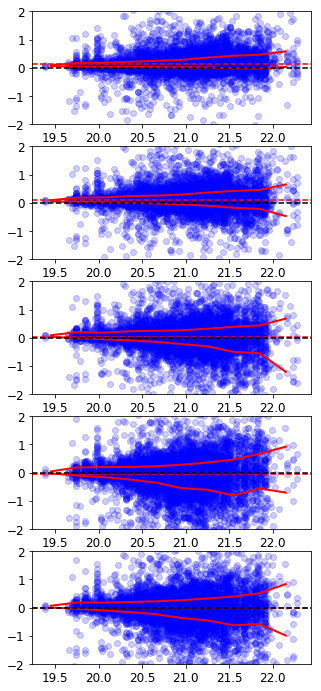

In [340]:
band='z'
figs,ax= plt.subplots(5,1,figsize=(5,12))

isRec= dat.obiwan_mask == 1
rad_aper= [0.5,0.75,1.0,1.5,2.0,3.5,5.0,7.0]
for cnt,i_aper in enumerate([4,5,6,7,-1]):
    ratio_area= 1. 
    #ratio_area= (1.5*dat.rhalf[isRec] / rad_aper[i_aper])**2
    if i_aper == -1:
        fix= ratio_area * np.average([dat.get('tractor_apflux_resid_'+band)[isRec,6],
                                      dat.get('tractor_apflux_resid_'+band)[isRec,7]],
                                    axis=0)
        assert(len(fix)) == len(dat[isRec])
    else:
        fix= dat.get('tractor_apflux_resid_'+band)[isRec,i_aper]* ratio_area
    dmag= plots.flux2mag(dat.get('tractor_flux_'+band)[isRec]) -\
            plots.flux2mag(dat.get(band+'flux')[isRec]+  fix)
    true_mag= plots.flux2mag(dat.get(band+'flux')[isRec]/\
                             dat.get('mw_transmission_'+band)[isRec])
    isPostiveFlux= ((np.isfinite(dmag)) &
                    (np.isfinite(true_mag)))
    print('true_mag=',true_mag[isPostiveFlux],'trac_mag=',dmag[isPostiveFlux])
    ax[cnt].scatter(true_mag[isPostiveFlux],dmag[isPostiveFlux],
                    alpha=0.2,c='b')
    ax[cnt].axhline(np.median(dmag[isPostiveFlux]),c='r',ls='--')
    print('median=',np.median(dmag[isPostiveFlux]))
    
    binned= plots.bin_up(true_mag[isPostiveFlux],dmag[isPostiveFlux], 
                         bin_minmax=(16,25),nbins=30)
    for perc in ['q25','q75']:
        ax[cnt].plot(binned['binc'],binned[perc],c='r',lw=2)

for i in range(5):
    ax[i].axhline(0,c='k',ls='--')
    ax[i].set_ylim(-2,2)

### num std deviations

true_mag= [ 20.93833542  21.20184135  20.8072052  ...,  21.31015587  21.77809906
  21.01568413] num_std_dev= [-4.34730214  1.21810205 -1.3827519  ..., -0.75389706 -0.73209095
  1.21890048]
median= -1.60525274255
true_mag= [ 20.93833542  21.20184135  20.8072052  ...,  21.31015587  21.77809906
  21.01568413] num_std_dev= [-5.8384393   1.99870241 -3.3788592  ..., -0.86452258 -1.63200962
  7.01542316]
median= -1.15402747036
true_mag= [ 20.93833542  21.20184135  20.8072052  ...,  21.31015587  21.77809906
  21.01568413] num_std_dev= [ -7.80473904   3.26783082  -7.03453518 ...,   3.40749519   0.0397263
  10.91315038]
median= -0.151277299666
true_mag= [ 20.93833542  21.20184135  20.8072052  ...,  21.31015587  21.77809906
  21.01568413] num_std_dev= [-13.29017572   4.01627538  -3.70750422 ...,   8.08162013  -7.86888209
  19.30161971]
median= 0.781358373371
true_mag= [ 20.93833542  21.20184135  20.8072052  ...,  21.31015587  21.77809906
  21.01568413] num_std_dev= [-10.54745738   3.6420531   -5.

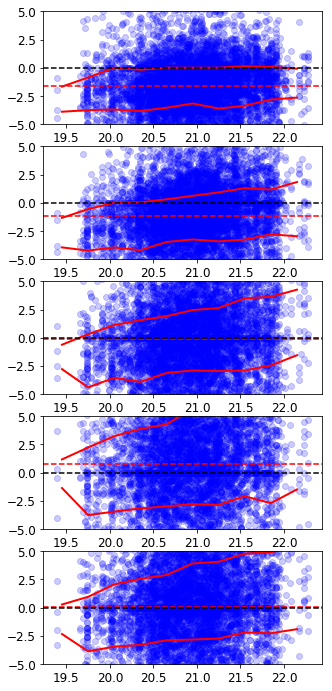

In [338]:
band='z'
figs,ax= plt.subplots(5,1,figsize=(5,12))

isRec= dat.obiwan_mask == 1
rad_aper= [0.5,0.75,1.0,1.5,2.0,3.5,5.0,7.0]
for cnt,i_aper in enumerate([4,5,6,7,-1]):
    ratio_area= 1. 
    #ratio_area= (1.5*dat.rhalf[isRec] / rad_aper[i_aper])**2
    if i_aper == -1:
        fix= ratio_area * np.average([dat.get('tractor_apflux_resid_'+band)[isRec,6],
                                      dat.get('tractor_apflux_resid_'+band)[isRec,7]],
                                    axis=0)
        assert(len(fix)) == len(dat[isRec])
    else:
        fix= dat.get('tractor_apflux_resid_'+band)[isRec,i_aper]* ratio_area
    num_std_dev= (dat.get('tractor_flux_'+band)[isRec] -\
                  (dat.get(band+'flux')[isRec]+  fix))*\
            np.sqrt(dat.get('tractor_flux_ivar_'+band)[isRec])
    true_mag= plots.flux2mag(dat.get(band+'flux')[isRec]/\
                             dat.get('mw_transmission_'+band)[isRec])
    print('true_mag=',true_mag,'num_std_dev=',num_std_dev)
    ax[cnt].scatter(true_mag,num_std_dev,
                    alpha=0.2,c='b')
    ax[cnt].axhline(np.median(num_std_dev),c='r',ls='--')
    print('median=',np.median(num_std_dev))
    
    binned= plots.bin_up(true_mag,num_std_dev, bin_minmax=(16,25),nbins=30)
    for perc in ['q25','q75']:
        ax[cnt].plot(binned['binc'],binned[perc],c='r',lw=2)

for i in range(5):
    ax[i].axhline(0,c='k',ls='--')
    ax[i].set_ylim(-5,5)

### delta RA, Dec

(-0.0001, 0.0001)

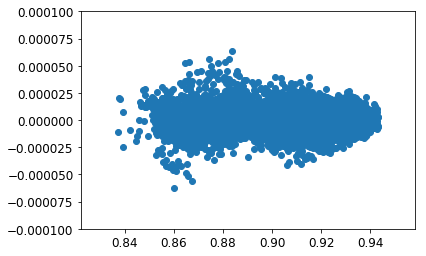

In [281]:
i= dat.obiwan_mask == 1
plt.scatter(dat.mw_transmission_g[i],
            dat.mw_transmission_g[i] - dat.tractor_mw_transmission_g[i])
plt.ylim(-1e-4,1e-4)

(-1.2, 1.2)

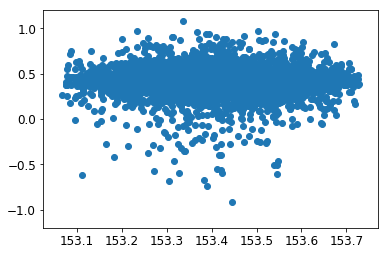

In [282]:
i= dat.obiwan_mask == 1
plt.scatter(dat.ra[i],
            (dat.ra[i] - dat.tractor_ra[i])*3600)
plt.ylim(-1.2,1.2)

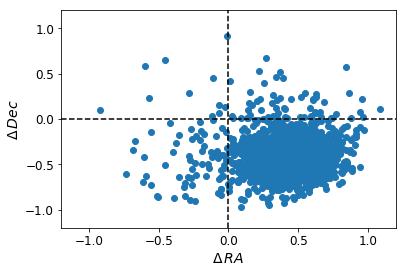

In [283]:
i= dat.obiwan_mask == 1
plt.scatter((dat.ra[i] - dat.tractor_ra[i])*3600,
            (dat.dec[i] - dat.tractor_dec[i])*3600)
plt.axhline(0,c='k',ls='--')
plt.axvline(0,c='k',ls='--')
plt.ylim(-1.2,1.2)
plt.xlim(-1.2,1.2)
plt.xlabel(r'$\Delta \, RA$')
plt.ylabel(r'$\Delta \, Dec$')

In [285]:
i= dat.obiwan_mask == 1
sns.distplot((dat.tractor_nora[i] - dat.tractor_ra[i])*3600,
             (dat.dec[i] - dat.tractor_dec[i])*3600)
plt.axhline(0,c='k',ls='--')
plt.axvline(0,c='k',ls='--')
plt.ylim(-1.2,1.2)
plt.xlim(-1.2,1.2)
plt.xlabel(r'$\Delta \, RA$')
plt.ylabel(r'$\Delta \, Dec$')

AttributeError: 'tabledata' object has no attribute 'tractor_nora'

fix= [ 0.01410908  0.00205612  0.0094271  ...,  0.05565902  0.00697286
  0.00865769] dflux= [-0.17664099  0.04343205 -0.02215747 ..., -0.12600998 -0.06912357
  0.01782683]
fix= [ 0.00511783 -0.00519097  0.01246918 ...,  0.01146335  0.00121295
  0.00036051] dflux= [-0.17664099  0.04343205 -0.02215747 ..., -0.12600998 -0.06912357
  0.01782683]
fix= [ 0.00151087 -0.00555547  0.00538299 ..., -0.02107371  0.00137389
 -0.00986581] dflux= [-0.17664099  0.04343205 -0.02215747 ..., -0.12600998 -0.06912357
  0.01782683]


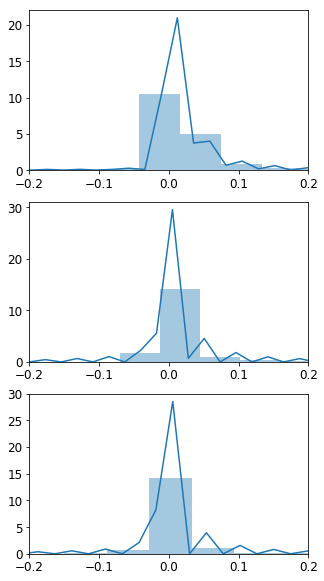

In [298]:
band='g'
figs,ax= plt.subplots(3,1,figsize=(5,10))

isRec= dat.obiwan_mask == 1
dflux= dat.get('tractor_flux_'+band)[isRec] - dat.get(band+'flux')[isRec]
rad_aper= [0.5,0.75,1.0,1.5,2.0,3.5,5.0,7.0]
for cnt,i_aper in enumerate([4,5,6]):
    ratio_area= (1.5*dat.rhalf[isRec] / rad_aper[i_aper])**2
    fix= dat.get('tractor_apflux_resid_'+band)[isRec,i_aper]* ratio_area
    print('fix=',fix,'dflux=',dflux)
    sns.distplot(fix,ax=ax[cnt])
    ax[cnt].set_xlim(-0.2,0.2)
    

### psfsize --> rhalf

In [ ]:
dat.tractor_allmask_g

In [243]:
# recovered
isRec= ((dat.obiwan_mask == 1) &
        (dat.tractor_brick_primary) &
        (dat.tractor_allmask_g == 0) & 
        (dat.tractor_allmask_r == 0) & 
        (dat.tractor_allmask_z == 0) & 
        ((dat.tractor_flux_g > 0) |
         (dat.tractor_flux_r > 0) |
         (dat.tractor_flux_z > 0))
       )
        
# Types
tractor_type= np.char.strip(dat.tractor_type)
TYPES= list(set(tractor_type))
isType={}
for typ in TYPES:
    isType[typ]= tractor_type == typ
print(isType.keys())
# rhalf ~ fwhm/2
fwhm_or_rhalf= np.zeros(len(dat))+np.nan
for typ in TYPES:
    if typ in ['','COMP']:
        continue
    i= (isType[typ]) & (isRec)
    if typ == 'PSF':
        fwhm_or_rhalf[i]= np.mean([dat.get('tractor_psfsize_'+band)[i]
                                   for band in 'grz'],axis=0) / 2
    elif typ == 'SIMP':
        fwhm_or_rhalf[i]= 0.5
    elif typ == 'EXP':
        fwhm_or_rhalf[i]= dat.tractor_shapeexp_r[i]
    elif typ == 'DEV':
        fwhm_or_rhalf[i]= dat.tractor_shapedev_r[i]

dict_keys(['', 'DEV', 'PSF', 'COMP', 'EXP', 'SIMP'])


/Users/kaylan1/miniconda3/envs/mlbook/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  
/Users/kaylan1/miniconda3/envs/mlbook/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


In [244]:
e1= np.zeros(len(dat))+np.nan
e2=e1.copy()
for typ in ['SIMP','EXP','DEV']:
    i= (isType[typ]) & (isRec)
    if typ in ['SIMP','EXP','REX']:
        e1[i]= dat.tractor_shapeexp_e1[i]
        e2[i]= dat.tractor_shapeexp_e2[i]
    elif typ in ['DEV']:
        e1[i]= dat.tractor_shapedev_e1[i]
        e2[i]= dat.tractor_shapedev_e2[i]

## Delta plots

In [255]:
diff={}

for key in ['ra','dec']:
    diff['delta_'+key]= dat.get('tractor_'+key)[isRec] - dat.get(key)[isRec] 
for key in 'xy':
    diff['delta_'+key]= dat.get('tractor_b'+key)[isRec] - dat.get(key)[isRec]
# More complicated quantities
diff['avg_num_std']= np.mean([(dat.get('tractor_flux_'+band)[isRec] - dat.get(band+'flux')[isRec])*\
                                np.sqrt(dat.get('tractor_flux_ivar_'+band)[isRec])
                              for band in 'grz'],axis=0)
diff['fracflux_sum']= np.sum([dat.get('tractor_fracflux_'+band)[isRec]
                              for band in 'grz'],axis=0)
diff['anymask_sum']= np.sum([dat.get('tractor_anymask_'+band)[isRec]
                             for band in 'grz'],axis=0)
diff['allmask_sum']= np.sum([dat.get('tractor_allmask_'+band)[isRec]
                             for band in 'grz'],axis=0)
assert(len(diff['avg_num_std']) == len(dat[isRec]))
for band in 'grz':
    diff[band+'_mag']= plots.flux2mag(dat.get(band+'flux')[isRec]/\
                                      dat.get('mw_transmission_'+band)[isRec])
    

diff['delta_rhalf']= fwhm_or_rhalf[isRec] - dat.rhalf[isRec]
diff['delta_e1']= e1[isRec] - dat.e1[isRec]
diff['delta_e2']= e2[isRec] - dat.e1[isRec]
# Scale
for key in ['ra','dec']:
    diff['delta_'+key]*= 3600 # arcsec
# Add Hue
diff['typ']= tractor_type[isRec]

diff_df= pd.DataFrame(diff)

In [260]:
diff_df.columns

Index(['allmask_sum', 'anymask_sum', 'avg_num_std', 'delta_dec', 'delta_e1',
       'delta_e2', 'delta_ra', 'delta_rhalf', 'delta_x', 'delta_y',
       'fracflux_sum', 'g_mag', 'r_mag', 'typ', 'z_mag'],
      dtype='object')

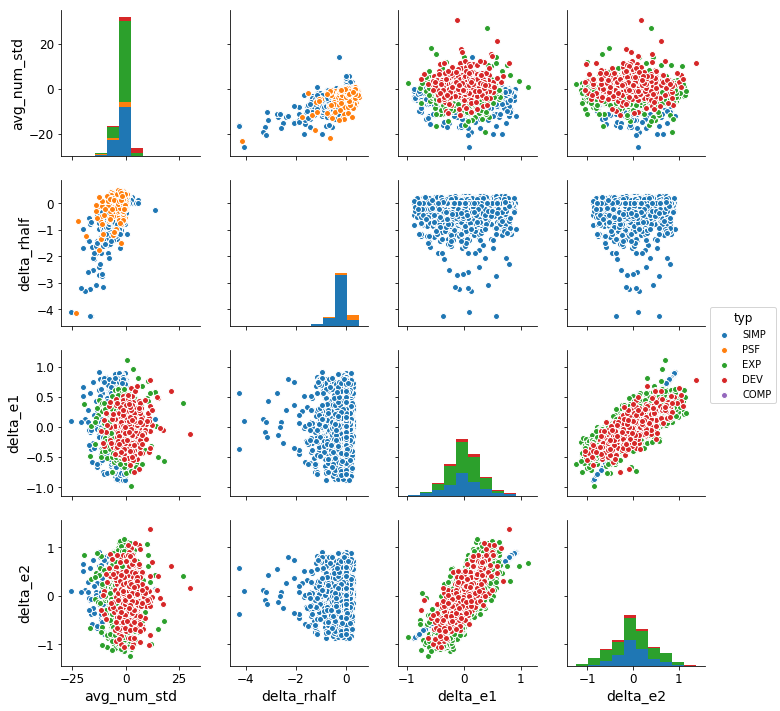

In [189]:
cols=['avg_num_std','delta_rhalf','typ','delta_e1','delta_e2']
sns.pairplot(diff_df[cols], hue="typ")

### Color by exp or dev: dflux/sigma vs. mag, delta_rhalf, e1, e2

In [252]:
set(dat.tractor_fracflux_g[dat.obiwan_mask == 1])

{0.0,
 0.0047294269315898418,
 0.0023323663044720888,
 0.0081588653847575188,
 0.0011112581705674529,
 0.00022863196500111371,
 0.0028280213009566069,
 0.030261635780334473,
 0.0059115500189363956,
 0.0083711715415120125,
 0.025556182488799095,
 0.0027173240669071674,
 0.0037926218938082457,
 0.00010892535647144541,
 0.0012100641615688801,
 0.012101290747523308,
 14.269735336303711,
 2.6745290756225586,
 2.8670837879180908,
 3.1662344932556152,
 3.4293971061706543,
 4.0342559814453125,
 4.6869664192199707,
 4.2039799690246582,
 4.6072125434875488,
 5.1494345664978027,
 0.00043466495117172599,
 0.003186654532328248,
 0.00039661111077293754,
 0.016525644809007645,
 0.0072397477924823761,
 0.046174246817827225,
 0.035119015723466873,
 0.00099933159071952105,
 0.04029545933008194,
 0.0039268843829631805,
 0.05319729819893837,
 0.035980585962533951,
 0.015883620828390121,
 7.1345424652099609,
 7.6121649742126465,
 7.8426203727722168,
 7.5551371574401855,
 7.2274575233459473,
 53.89010620117

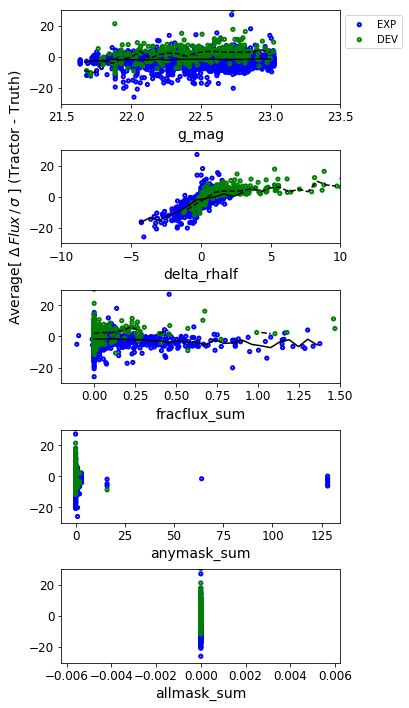

In [263]:
xaxis_band='g'

isEXP= (diff['typ'] == 'EXP') | (diff['typ'] == 'SIMP') 
isDEV= (diff['typ'] == 'DEV')

fig,axes= plt.subplots(5,1,figsize=(5,12))
plt.subplots_adjust(hspace=0.5)
bin_minmax= dict(g_mag=(21.5,23.5),
                 delta_rhalf=(-10,10),
                 delta_e1=(-1,1),
                 delta_e2=(-1,1),
                 fracflux_sum=(-0.2,1.5)
                )
for ax,xkey in zip(axes,
                   ['g_mag','delta_rhalf','fracflux_sum',
                    'anymask_sum','allmask_sum']):
    for keep,label,color,ls in zip([isEXP,isDEV],
                                ['EXP','DEV'],
                                'bg',
                                ['-','--']):
        ax.scatter(diff[xkey][keep],diff['avg_num_std'][keep],
                   edgecolor=color,s=10,c='none',lw=2.,alpha=1,
                   label=label)
        if bin_minmax.get(xkey,None):
            binned= plots.bin_up(diff[xkey][keep],diff['avg_num_std'][keep],
                                 bin_minmax=bin_minmax[xkey],nbins=30)
            for perc in ['q50']: #,'q25','q75']:
                ax.plot(binned['binc'],binned[perc],c='k',ls=ls)
            ax.set_xlim(bin_minmax[xkey])
    ax.set_xlabel(xkey)

for row in range(5):
    axes[row].set_ylim(-30,30)
leg=axes[0].legend(loc='upper left',bbox_to_anchor=(1,1))
axes[1].set_ylabel(r'Average[ $\Delta\, Flux\,/\,\sigma$ ] (Tractor - Truth)')
    

(-10, 10)

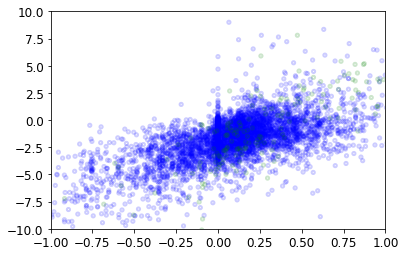

In [269]:
for keep,label,color,ls in zip([isEXP,isDEV],
                            ['EXP','DEV'],
                            'bg',
                            ['-','--']):
    plt.scatter(diff['delta_rhalf'][keep],diff['avg_num_std'][keep],
               edgecolor=color,s=10,c='none',lw=2.,alpha=0.2,
               label=label)
plt.xlim(-1,1)
plt.ylim(-10,10)

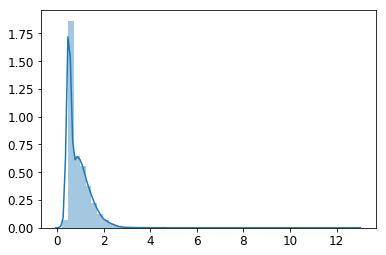

In [271]:
sns.distplot(fwhm_or_rhalf[isRec][isEXP]) # - dat.rhalf[isRec]

(-10, 10)

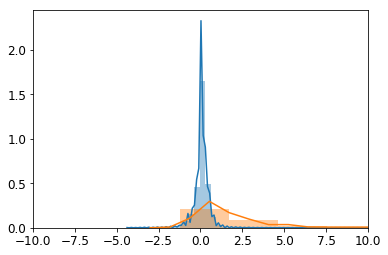

In [247]:
sns.distplot(diff['delta_rhalf'][isEXP])
sns.distplot(diff['delta_rhalf'][isDEV])
plt.xlim(-10,10)

## Compare to straigth truth and measured quanities

In [181]:
d={}

for key in ['ra','dec']:
    d[key]= dat.get(key)[isRec] 
for key in 'xy':
    d[key]= dat.get(key)[isRec]
# More complicated quantities
d['avg_num_std']= np.mean([(dat.get('tractor_flux_'+band)[isRec] - dat.get(band+'flux')[isRec])*\
                             np.sqrt(dat.get('tractor_flux_ivar_'+band)[isRec])
                            for band in 'grz'],axis=0)
assert(len(d['avg_num_std']) == len(dat[isRec]))
#for band in 'grz':
#    diff['num_stddev_'+band]= (dat.get('tractor_flux_'+band)[isRec] - dat.get(band+'flux')[isRec])*\
#                               np.sqrt(dat.get('tractor_flux_ivar_'+band)[isRec])

d['rhalf']= dat.rhalf[isRec]
d['e1']= dat.e1[isRec]
d['e2']= dat.e1[isRec]
# Scale
for key in ['ra','dec']:
    d[key]*= 3600 # arcsec
# Add Hue
d['typ']= tractor_type[isRec]

for key in d.keys():
    if not key in ['avg_num_std']:
        d[key]= np.array(d[key]).byteswap().newbyteorder()

d= pd.DataFrame(d)

In [179]:
d.columns

Index(['avg_num_std', 'dec', 'e1', 'e2', 'ra', 'rhalf', 'typ', 'x', 'y'], dtype='object')

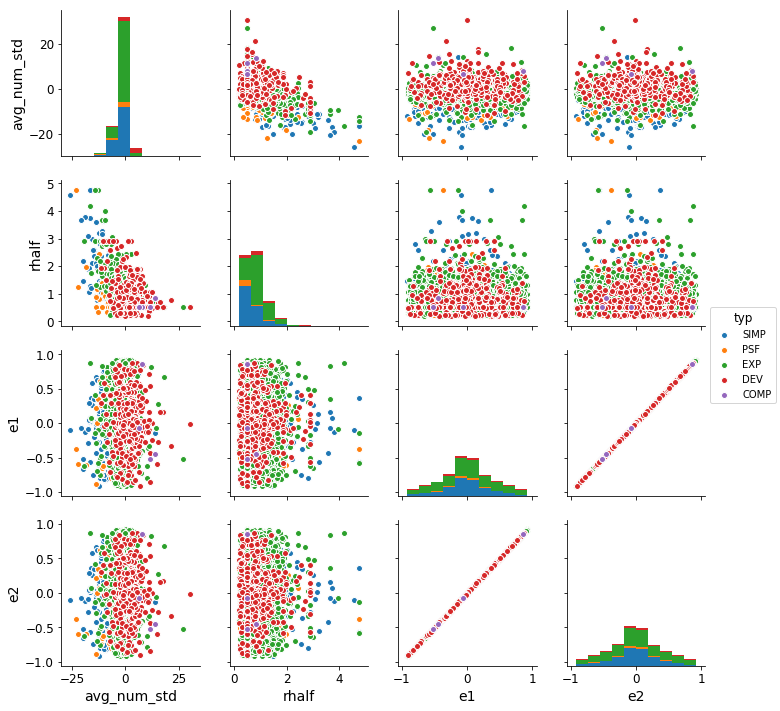

In [182]:
cols=['avg_num_std','rhalf','typ','e1','e2']
sns.pairplot(d[cols], hue="typ")

### delta Flux/err_estim vs. mag, with q25,50,75 lines

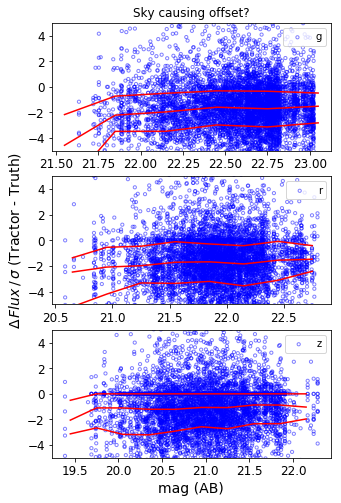

In [70]:
i= dat.obiwan_mask == 1
#truth= plots.flux2mag(dat.gflux[i]/dat.mw_transmission_g[i])
#meas= plots.flux2mag(dat.tractor_flux_g[i]/dat.tractor_mw_transmission_g[i])

fig,ax= plt.subplots(3,1,figsize=(5,8))
plt.subplots_adjust(hspace=0.2)
for iax,band in enumerate('grz'):
    x= plots.flux2mag(dat.get(band+'flux')[i]/\
                      dat.get('mw_transmission_'+band)[i])
    y= (dat.get('tractor_flux_'+band)[i] - dat.get(band+'flux')[i])*\
        np.sqrt(dat.get('tractor_flux_ivar_'+band)[i])
    ax[iax].scatter(x,y,edgecolor='b',
                    s=10,c='none',lw=1.,alpha=0.5,
                    label='%s' % band)
    binned= plots.bin_up(x,y, bin_minmax=(16,25),nbins=30)
    for perc in ['q25','q50','q75']:
        ax[iax].plot(binned['binc'],binned[perc],c='r')

for iax,band in enumerate('grz'):
    ax[iax].legend(loc='upper right')
    ax[iax].set_ylim(-5,5)
ax[1].set_ylabel(r'$\Delta\, Flux\,/\,\sigma$ (Tractor - Truth)')
ax[0].set_title('Sky causing offset?')
ax[2].set_xlabel('mag (AB)')

### delta Flux/err_estim vs. mag for a Single band 4 panels for PSF, SIMP or REX, EXP, COMP

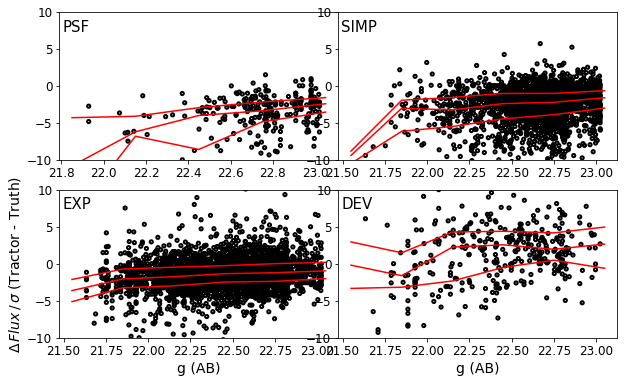

In [110]:
band='g'

isRec= dat.obiwan_mask == 1
# TYPES= 'psf simp exp dev comp rex'.split(' ')
tractor_type= np.char.strip(dat.tractor_type)
# TYPES= set(tractor_type)
# print(TYPES)
TYPES= 'psf simp exp dev'.upper().split(' ')
# print(types)
isType={}
for typ in TYPES:
    isType[typ]= tractor_type == typ
#isType=dict(typ= tractor_type == typ
#            for typ in set(tractor_type))
#truth= plots.flux2mag(dat.gflux[i]/dat.mw_transmission_g[i])
#meas= plots.flux2mag(dat.tractor_flux_g[i]/dat.tractor_mw_transmission_g[i])

fig,ax= plt.subplots(2,2,figsize=(10,6))
plt.subplots_adjust(hspace=0.2,wspace=0)
cnt=-1
for row in range(2):
    for col in range(2):
        cnt+=1
        typ= TYPES[cnt]
        i= (isRec) & (isType[typ])
        if len(dat[i]) > 0:
            x= plots.flux2mag(dat.get(band+'flux')[i]/\
                              dat.get('mw_transmission_'+band)[i])
            y= (dat.get('tractor_flux_'+band)[i] - dat.get(band+'flux')[i])*\
                np.sqrt(dat.get('tractor_flux_ivar_'+band)[i])
            ax[row,col].scatter(x,y,edgecolor='k',
                                s=10,c='none',lw=2.,alpha=1)
            binned= plots.bin_up(x,y, bin_minmax=(16,25),nbins=30)
            for perc in ['q25','q50','q75']:
                ax[row,col].plot(binned['binc'],binned[perc],c='r')
            
            plots.mytext(ax[row,col],0.01,0.9,typ,fontsize=15)
            ax[row,col].set_ylim(-10,10)

#leg=ax[0].legend(loc=(0,1.01),ncol=3,markerscale=3)
ax[1,0].set_ylabel(r'$\Delta\, Flux\,/\,\sigma$ (Tractor - Truth)')
for i in range(2):
    ax[1,i].set_xlabel('%s (AB)' % band)

### q50 filled q25-75 of delta Flux/err_estim vs. mag for each band, 1 panel per PSF, SIMP or REX, EXP, DEV

In [112]:
plt.fill_between?

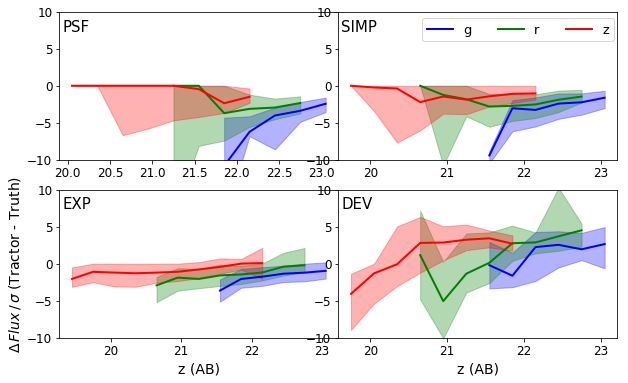

In [119]:
isRec= dat.obiwan_mask == 1
# TYPES= 'psf simp exp dev comp rex'.split(' ')
tractor_type= np.char.strip(dat.tractor_type)
# TYPES= set(tractor_type)
# print(TYPES)
TYPES= 'psf simp exp dev'.upper().split(' ')
# print(types)
isType={}
for typ in TYPES:
    isType[typ]= tractor_type == typ
#isType=dict(typ= tractor_type == typ
#            for typ in set(tractor_type))
#truth= plots.flux2mag(dat.gflux[i]/dat.mw_transmission_g[i])
#meas= plots.flux2mag(dat.tractor_flux_g[i]/dat.tractor_mw_transmission_g[i])

fig,ax= plt.subplots(2,2,figsize=(10,6))
plt.subplots_adjust(hspace=0.2,wspace=0)
cnt=-1
for row in range(2):
    for col in range(2):
        cnt+=1
        typ= TYPES[cnt]
        i= (isRec) & (isType[typ])
        if len(dat[i]) > 0:
            for band,color in zip('grz','bgr'):
                x= plots.flux2mag(dat.get(band+'flux')[i]/\
                                  dat.get('mw_transmission_'+band)[i])
                y= (dat.get('tractor_flux_'+band)[i] - dat.get(band+'flux')[i])*\
                    np.sqrt(dat.get('tractor_flux_ivar_'+band)[i])
    #             ax[row,col].scatter(x,y,edgecolor='k',
    #                                 s=10,c='none',lw=2.,alpha=1)
                binned= plots.bin_up(x,y, bin_minmax=(16,25),nbins=30)
                ax[row,col].plot(binned['binc'],binned['q50'],c=color,
                                 lw=2,label=band)
                ax[row,col].fill_between(binned['binc'],
                                         binned['q25'],binned['q75'],
                                         color=color,alpha=0.3)

            plots.mytext(ax[row,col],0.01,0.9,typ,fontsize=15)
            ax[row,col].set_ylim(-10,10)

leg=ax[0,1].legend(loc=(0.3,0.8),ncol=3,fontsize=13)
ax[1,0].set_ylabel(r'$\Delta\, Flux\,/\,\sigma$ (Tractor - Truth)')
for i in range(2):
    ax[1,i].set_xlabel('%s (AB)' % band)

### delta Flux/err_estim vs. mag but ADD for all three bands, so if tractor wrong by 2 std dev in all bands would have a +6 on the plot, one panel for each PSF, SIMP or REX, EXP, COMP

### have to choose band to plot mag of on the xaxis

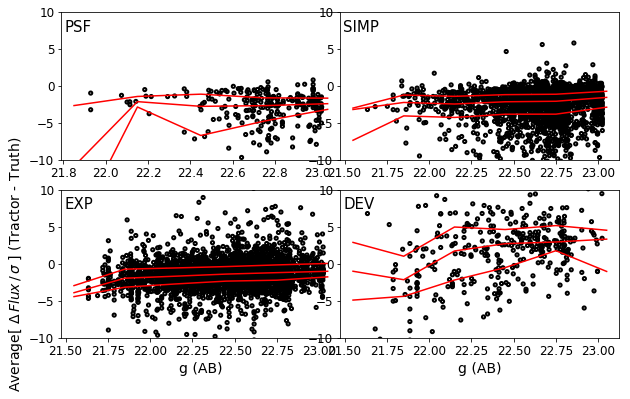

In [126]:
xaxis_band='g'

isRec= dat.obiwan_mask == 1
# TYPES= 'psf simp exp dev comp rex'.split(' ')
tractor_type= np.char.strip(dat.tractor_type)
# TYPES= set(tractor_type)
# print(TYPES)
TYPES= 'psf simp exp dev'.upper().split(' ')
# print(types)
isType={}
for typ in TYPES:
    isType[typ]= tractor_type == typ
#isType=dict(typ= tractor_type == typ
#            for typ in set(tractor_type))
#truth= plots.flux2mag(dat.gflux[i]/dat.mw_transmission_g[i])
#meas= plots.flux2mag(dat.tractor_flux_g[i]/dat.tractor_mw_transmission_g[i])

fig,ax= plt.subplots(2,2,figsize=(10,6))
plt.subplots_adjust(hspace=0.2,wspace=0)
cnt=-1
for row in range(2):
    for col in range(2):
        cnt+=1
        typ= TYPES[cnt]
        i= (isRec) & (isType[typ])
        if len(dat[i]) > 0:
            x= plots.flux2mag(dat.get(xaxis_band+'flux')[i]/\
                                      dat.get('mw_transmission_'+xaxis_band)[i])
            y= np.mean([(dat.get('tractor_flux_'+band)[i] - dat.get(band+'flux')[i])*\
                         np.sqrt(dat.get('tractor_flux_ivar_'+band)[i])
                        for band in 'grz'],axis=0)
            assert(len(y) == len(dat[i]))
            ax[row,col].scatter(x,y,edgecolor='k',
                                s=10,c='none',lw=2.,alpha=1)
            binned= plots.bin_up(x,y, bin_minmax=(16,25),nbins=30)
            for perc in ['q25','q50','q75']:
                ax[row,col].plot(binned['binc'],binned[perc],c='r')
            
            plots.mytext(ax[row,col],0.01,0.9,typ,fontsize=15)
            ax[row,col].set_ylim(-10,10)

#leg=ax[0].legend(loc=(0,1.01),ncol=3,markerscale=3)
ax[1,0].set_ylabel(r'Average[ $\Delta\, Flux\,/\,\sigma$ ] (Tractor - Truth)')
for i in range(2):
    ax[1,i].set_xlabel('%s (AB)' % xaxis_band)

### Ditto above except draw median lines for all TYPES on same panel, and different panel for xaxis_band  in grz

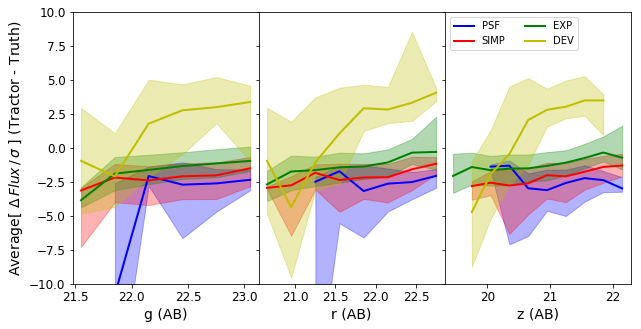

In [132]:
isRec= dat.obiwan_mask == 1
# TYPES= 'psf simp exp dev comp rex'.split(' ')
tractor_type= np.char.strip(dat.tractor_type)
# TYPES= set(tractor_type)
# print(TYPES)
TYPES= 'psf simp exp dev'.upper().split(' ')
# print(types)
isType={}
for typ in TYPES:
    isType[typ]= tractor_type == typ
#isType=dict(typ= tractor_type == typ
#            for typ in set(tractor_type))
#truth= plots.flux2mag(dat.gflux[i]/dat.mw_transmission_g[i])
#meas= plots.flux2mag(dat.tractor_flux_g[i]/dat.tractor_mw_transmission_g[i])

fig,axes= plt.subplots(1,3,figsize=(10,5))
plt.subplots_adjust(wspace=0)
cnt=-1
for ax,xaxis_band in zip(axes,'grz'):
    for typ,color in zip(TYPES,'brgy'):
        i= (isRec) & (isType[typ])
        if len(dat[i]) > 0:
            x= plots.flux2mag(dat.get(xaxis_band+'flux')[i]/\
                                      dat.get('mw_transmission_'+xaxis_band)[i])
            y= np.mean([(dat.get('tractor_flux_'+band)[i] - dat.get(band+'flux')[i])*\
                         np.sqrt(dat.get('tractor_flux_ivar_'+band)[i])
                        for band in 'grz'],axis=0)
            assert(len(y) == len(dat[i]))
            
            binned= plots.bin_up(x,y, bin_minmax=(16,25),nbins=30)
            ax.plot(binned['binc'],binned['q50'],c=color,
                    lw=2,label=typ)
            ax.fill_between(binned['binc'],
                            binned['q25'],binned['q75'],
                            color=color,alpha=0.3)
            
    #plots.mytext(ax,0.01,0.9,typ,fontsize=15)
    ax.set_ylim(-10,10)
    ax.set_xlabel('%s (AB)' % xaxis_band)

leg=axes[-1].legend(loc='upper left',ncol=2)
axes[0].set_ylabel(r'Average[ $\Delta\, Flux\,/\,\sigma$ ] (Tractor - Truth)')
for i in [1,2]:
    axes[i].set_yticklabels([])

In [121]:
np.mean([np.arange(10) for i in range(3)],axis=0)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])